# Ayudantía 5: ANOVA test


Para abrir con Google Colab: <a target="_blank" href="https://githubtocolab.com/SysBioengLab/IIQ3402-Statistical-Design/blob/main/Ayudantias/Ayudantia5_TestDeHipotesisANOVA.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


In [ ]:
!pip install statsmodels
!pip install seaborn

# Distribución Binomial y Distribución F


## Distribución Binomial

Calcule cual es la probabilidad de obtener exactamente 10 éxitos al lanzar 35 dados no alterados.

---

La distribución Binomial se caracteriza por tener la siguiente forma

$$
P(x = k) = \binom{n}{k} p ^ k (1-p)^{(n-k)}
$$
Donde p es la probabilidad de obtener un éxito, k la cantidad de éxitos y n la cantidad de intentos.
Así, considerando un éxito obtener un 6, la probabilidad de dicho valor es 1/6. Tenemos 10 éxitos (k = 10) y 35 intentos (n=35). Así la probabilidad de obtener 10 éxitos es:

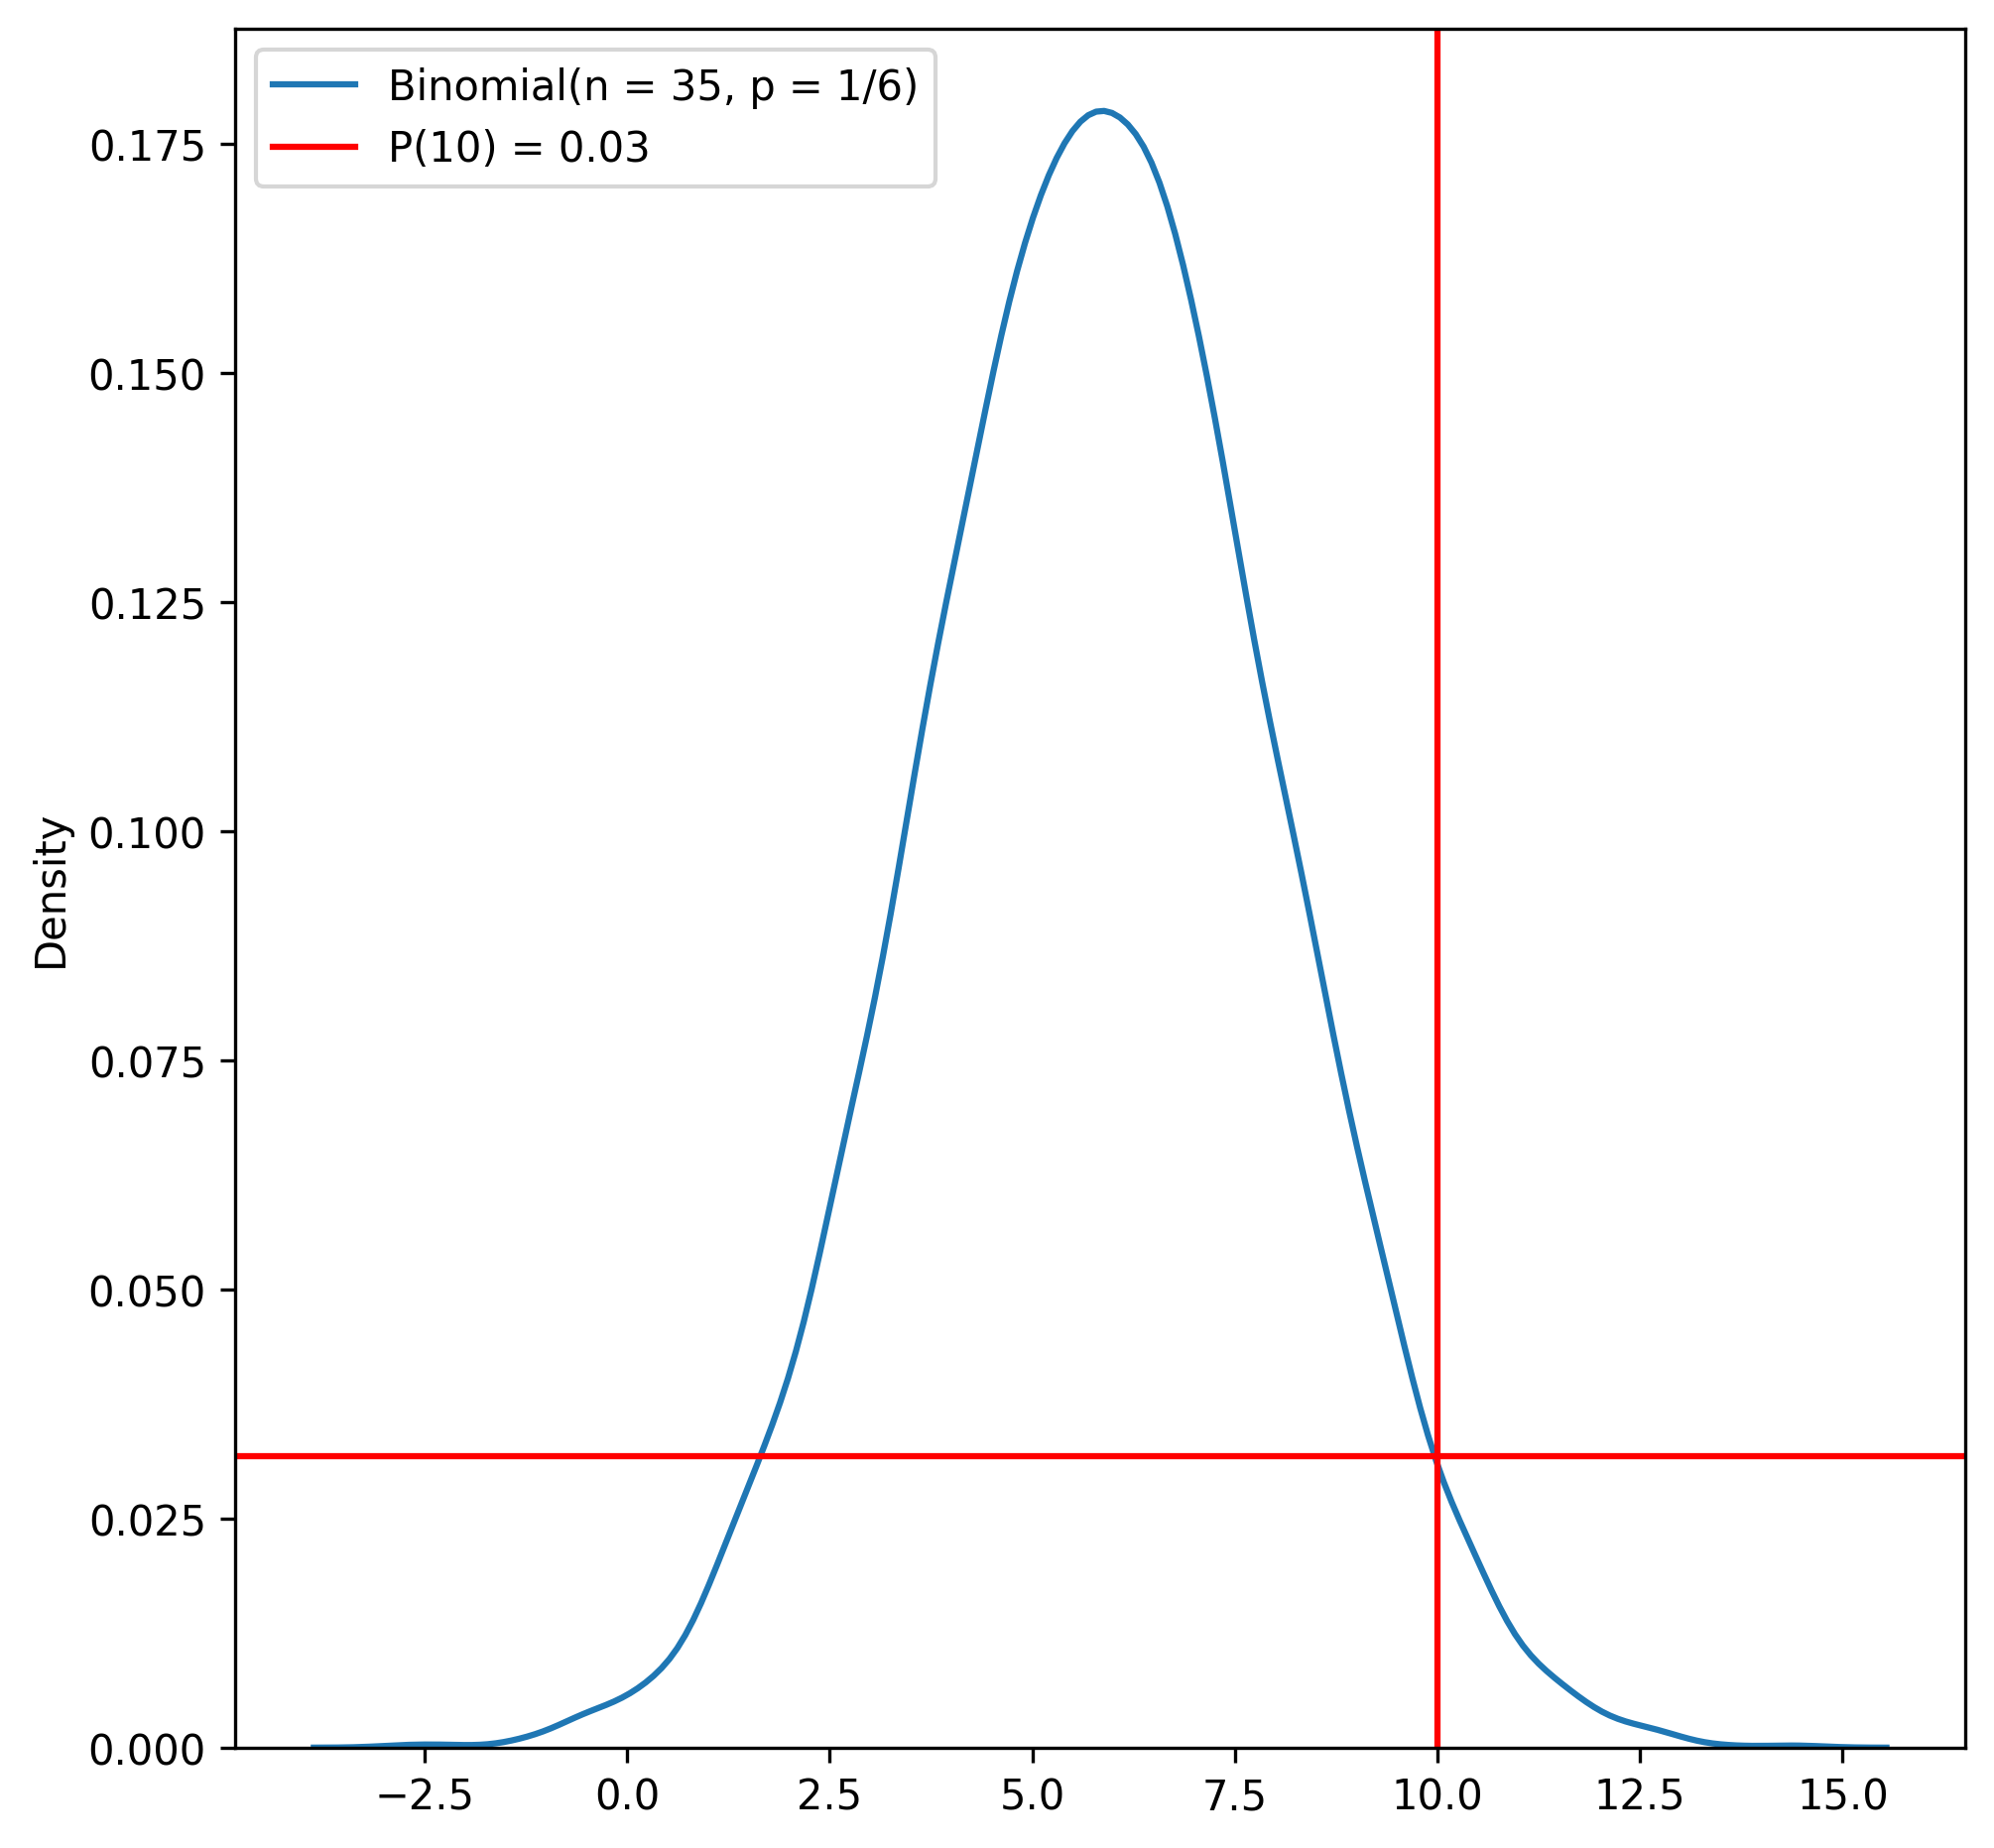

In [ ]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)

prob_pedida = st.binom.pmf(k=10, n=35, p=1/6)

fig, ax = plt.subplots(dpi = 300, figsize = (7.5,7.5))
bin_rand = st.norm.rvs(loc = 35 * 1/6, scale = np.sqrt(35 * 1/6 * (1 - 1/6)), size = 10000)
sns.kdeplot(bin_rand, ax = ax, label = 'Binomial(n = 35, p = 1/6)')
# notar que usamos una normal para aproximar debido a problemas de distribuciones discretas
ax.axvline(10, color = 'red')
ax.axhline(prob_pedida, color = 'red', label = f'P(10) = {prob_pedida:.2f}')
ax.legend()



Calcule cual es la probabilidad de obtener al menos 20 éxitos al lanzar 100 monedas no alteradas.

---

En este caso tenemos una distribución Binomial con una probabilidad de éxito $p=1/2$ y intentos $n=100$.


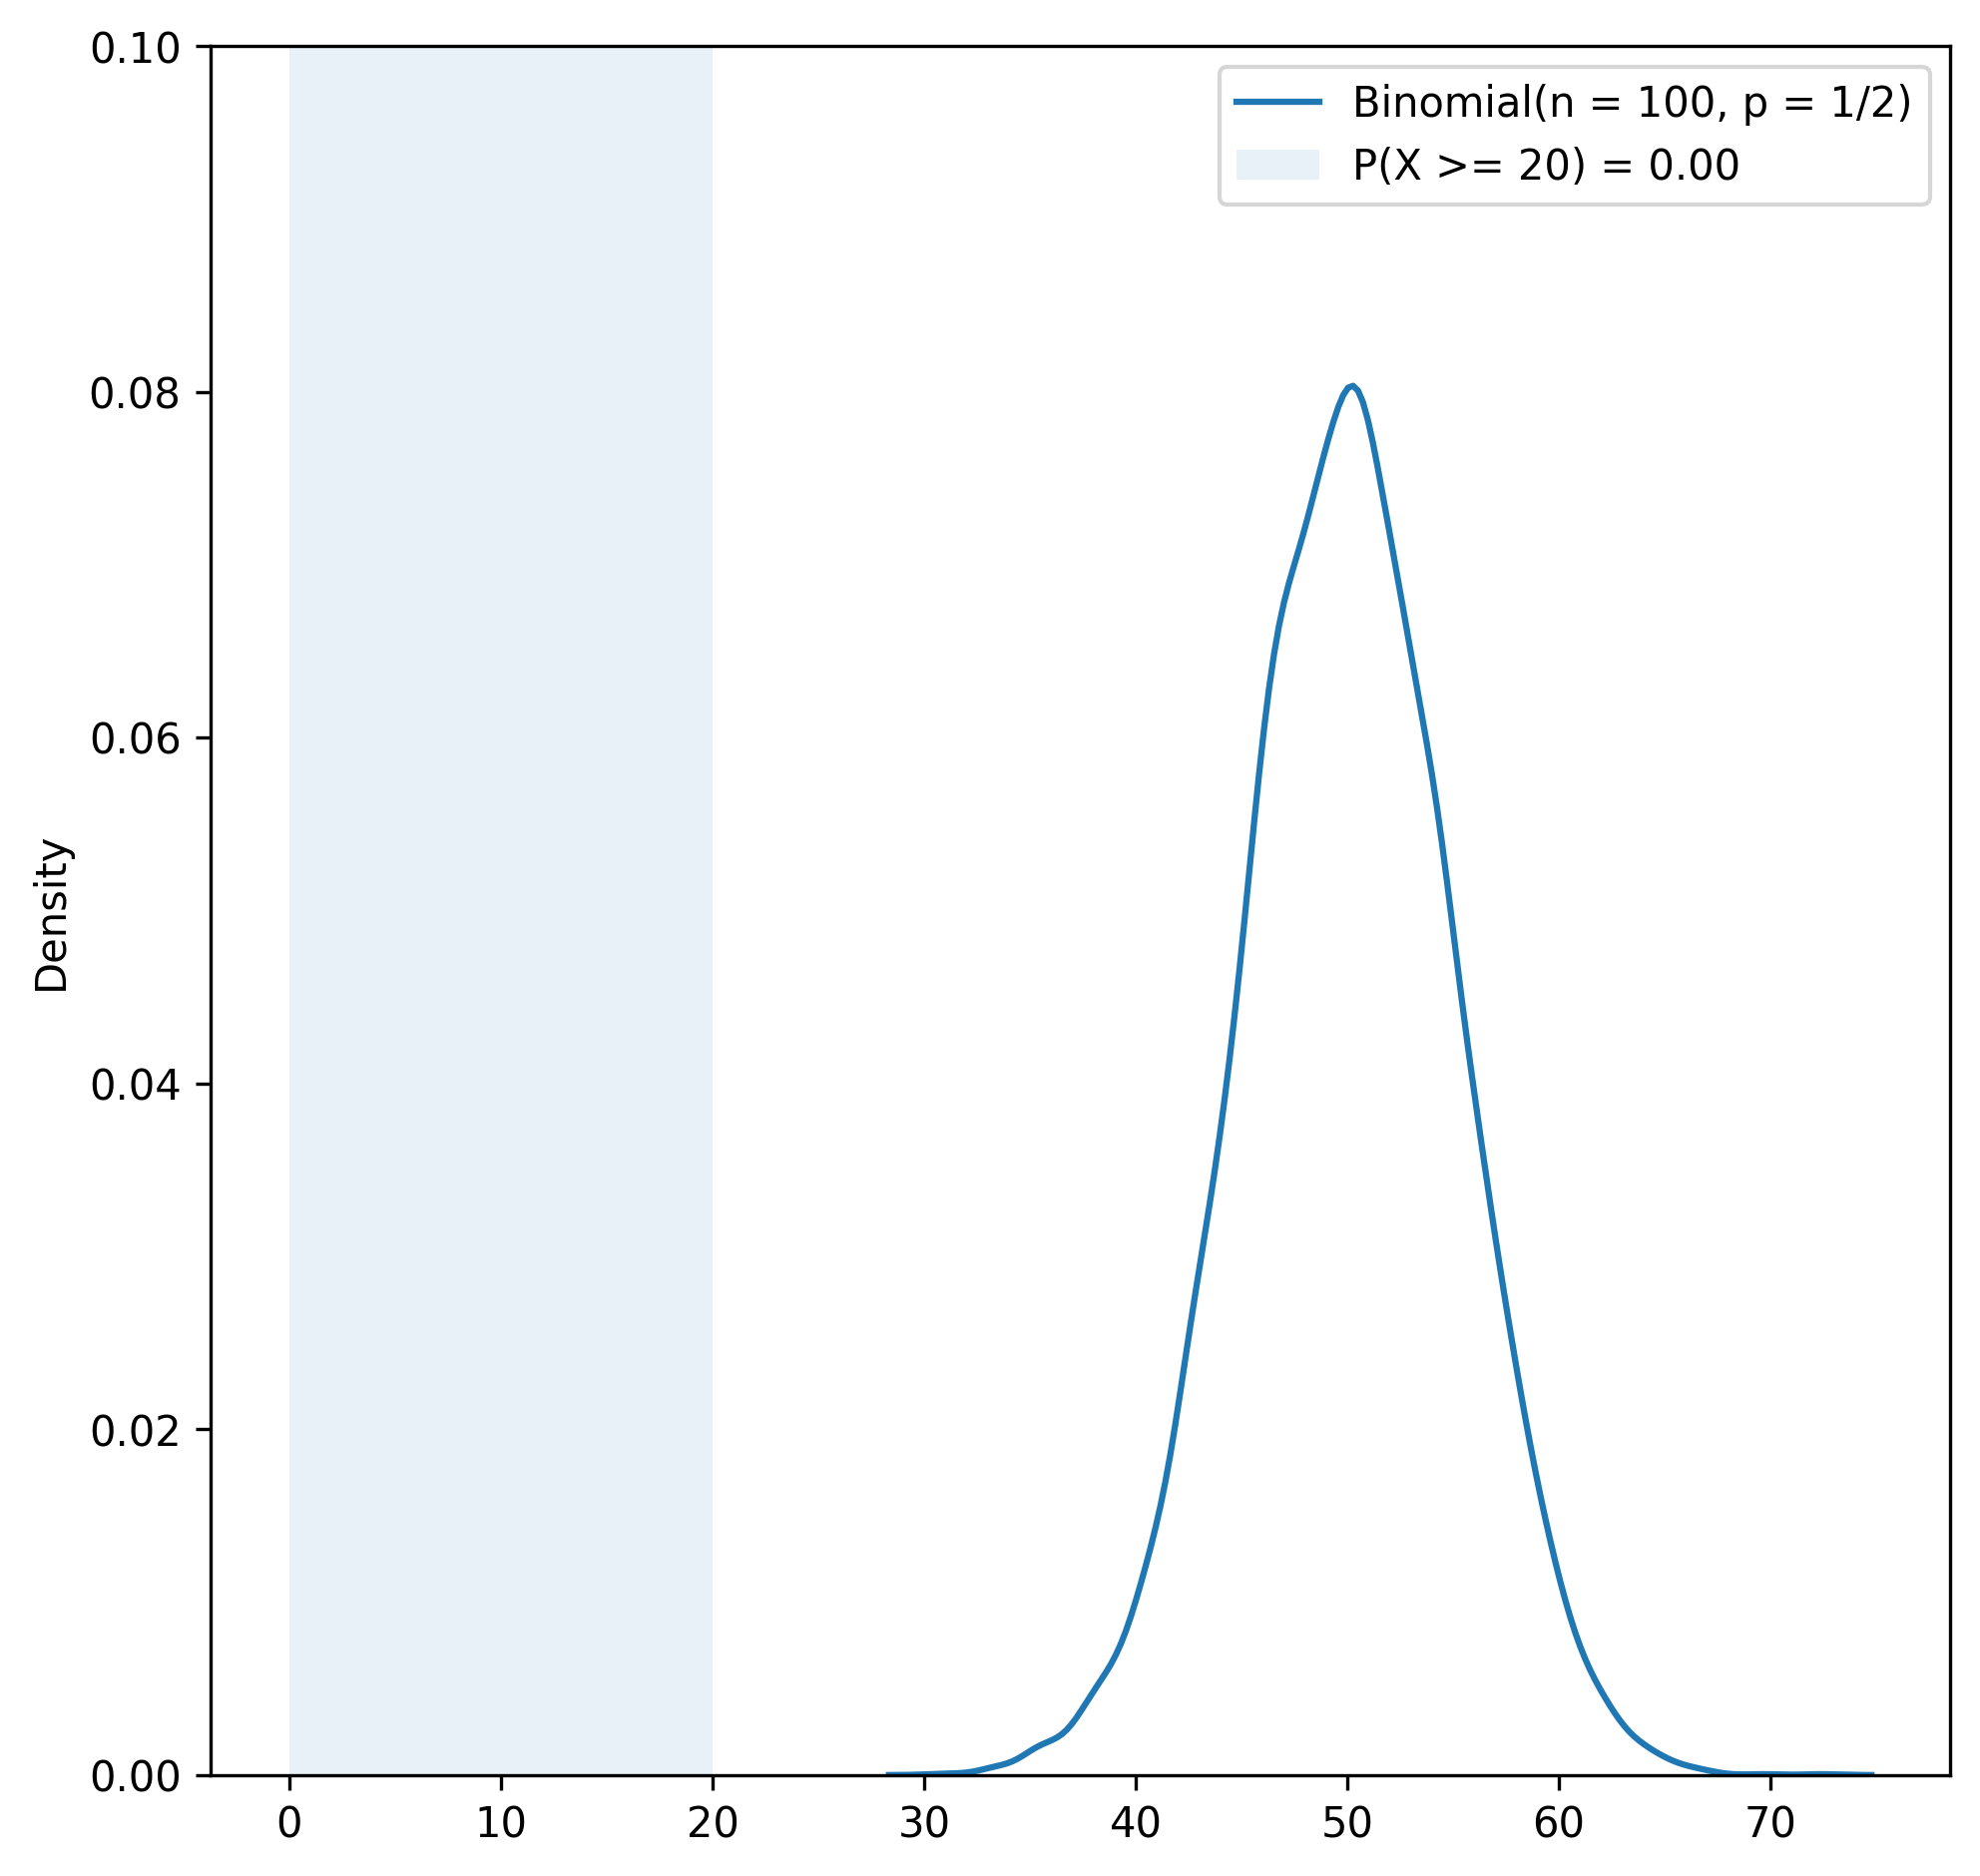

In [ ]:
prob = st.binom.cdf(k = 20, p = 1/2, n = 100)
binom_rand = st.norm.rvs(loc = 100 * 1/2, scale = np.sqrt(100 * 1/2 * (1 - 1/2)), size = 10000)
fig, ax = plt.subplots(dpi = 300, figsize = (7.5,7.5))
sns.kdeplot(binom_rand, ax = ax, label = 'Binomial(n = 100, p = 1/2)')
ax.fill_between(x = [0,20], y1 = 0, y2= 0.1, alpha = 0.1, label = f'P(X >= 20) = {prob:.2f}' )
ax.set_ylim(0,0.1)
ax.legend()

Demuestre empíricamente la relación entre una distribución binomial y una distribución normal para muestras grandes.

---

La distribución binomial y la distribución normal se relacionan para n grande.

Dado una $Binom( n , p)$ se puede aproximar con una distribución normal $N(np, np(1-p))$.


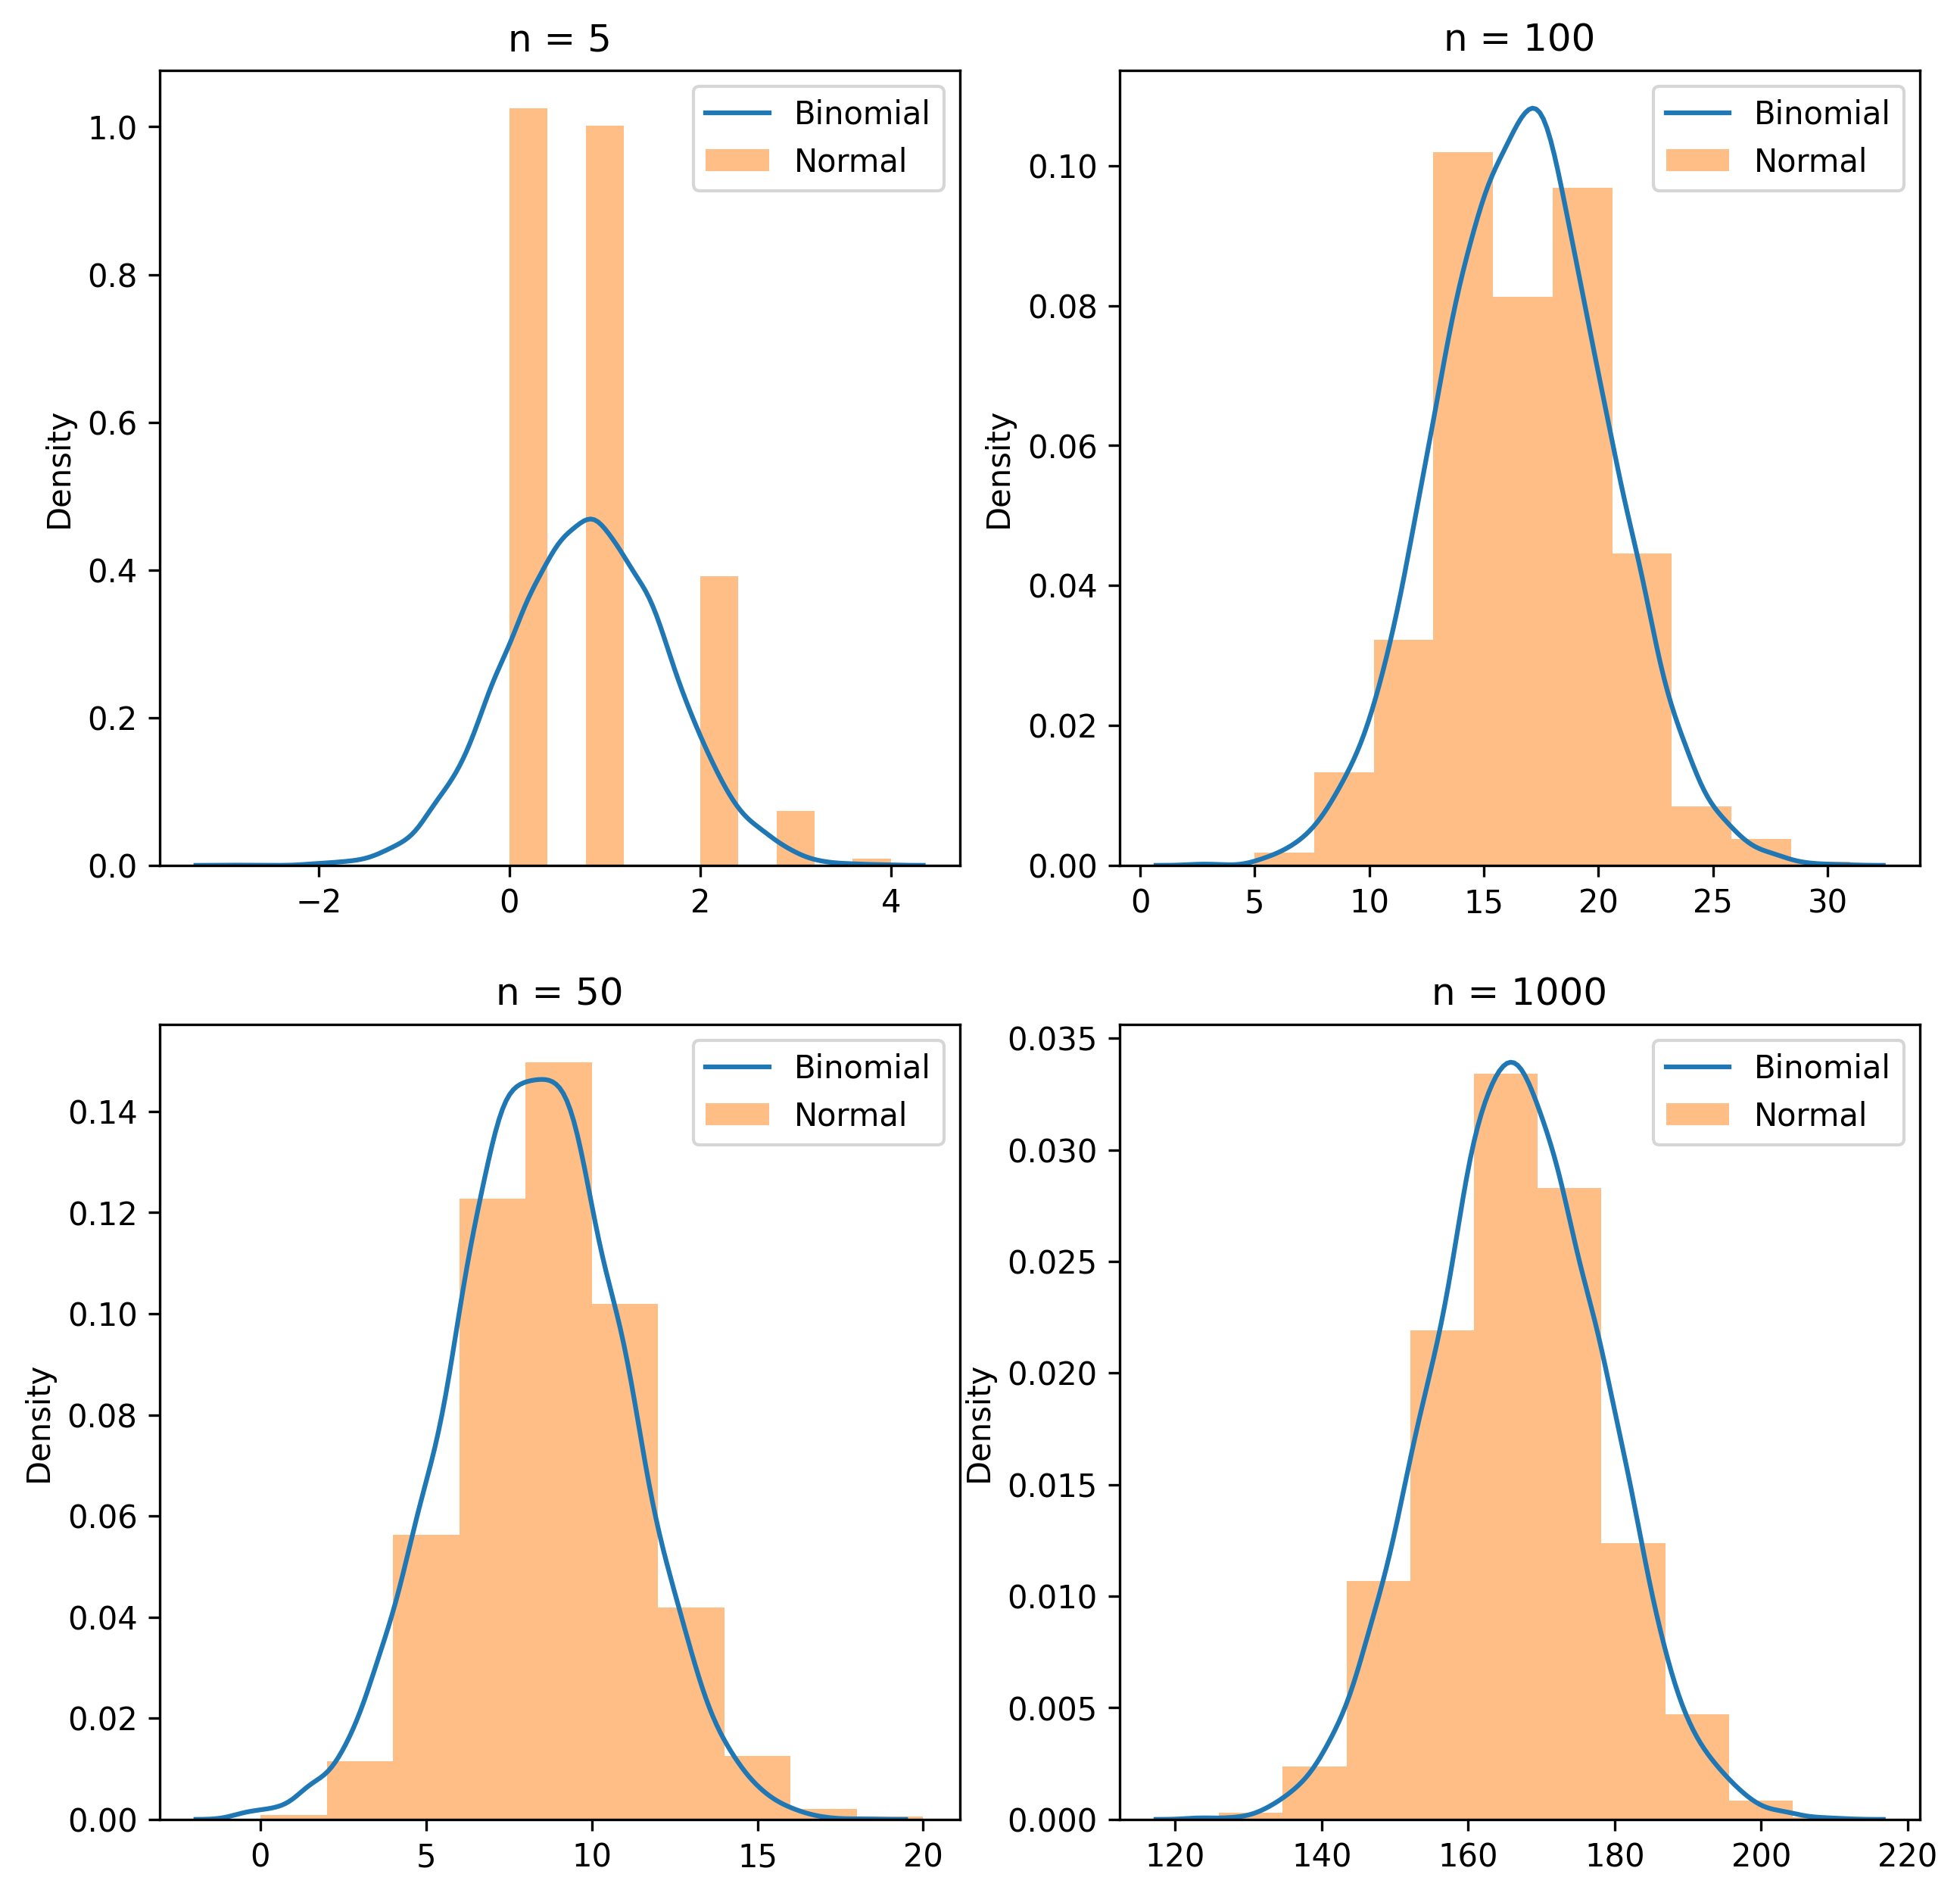

In [ ]:
fig, ax = plt.subplots(2,2, dpi = 300, figsize = (10,10))
i, j = 0,0
for n in [5, 50, 100, 1000]:
    binom_rand = st.binom.rvs(n = n, p = 1/6, size = 10000)
    norm_rand = st.norm.rvs(loc = n * 1/6, scale = np.sqrt(n * 1/6 * (1 - 1/6)), size = 10000)
    sns.kdeplot(norm_rand, ax = ax[i,j], label = 'Binomial', alpha = 1)
    ax[i,j].hist(binom_rand, density = True, alpha = 0.5, label = 'Normal')
    ax[i,j].legend(loc = 'upper right')
    ax[i,j].set_title(f'n = {n}')
    i += 1
    if i == 2:
        i = 0
        j += 1


## Distribución F
Calcule la probabilidad de obtener un valor 1.4 para una distribución f con df1 = 20 y df2 = 30.

---

La distribución F es una distribución construida para el test estadístico ANOVA.
Esta se parametriza por los grados dos de libertad de la prueba ANOVA.




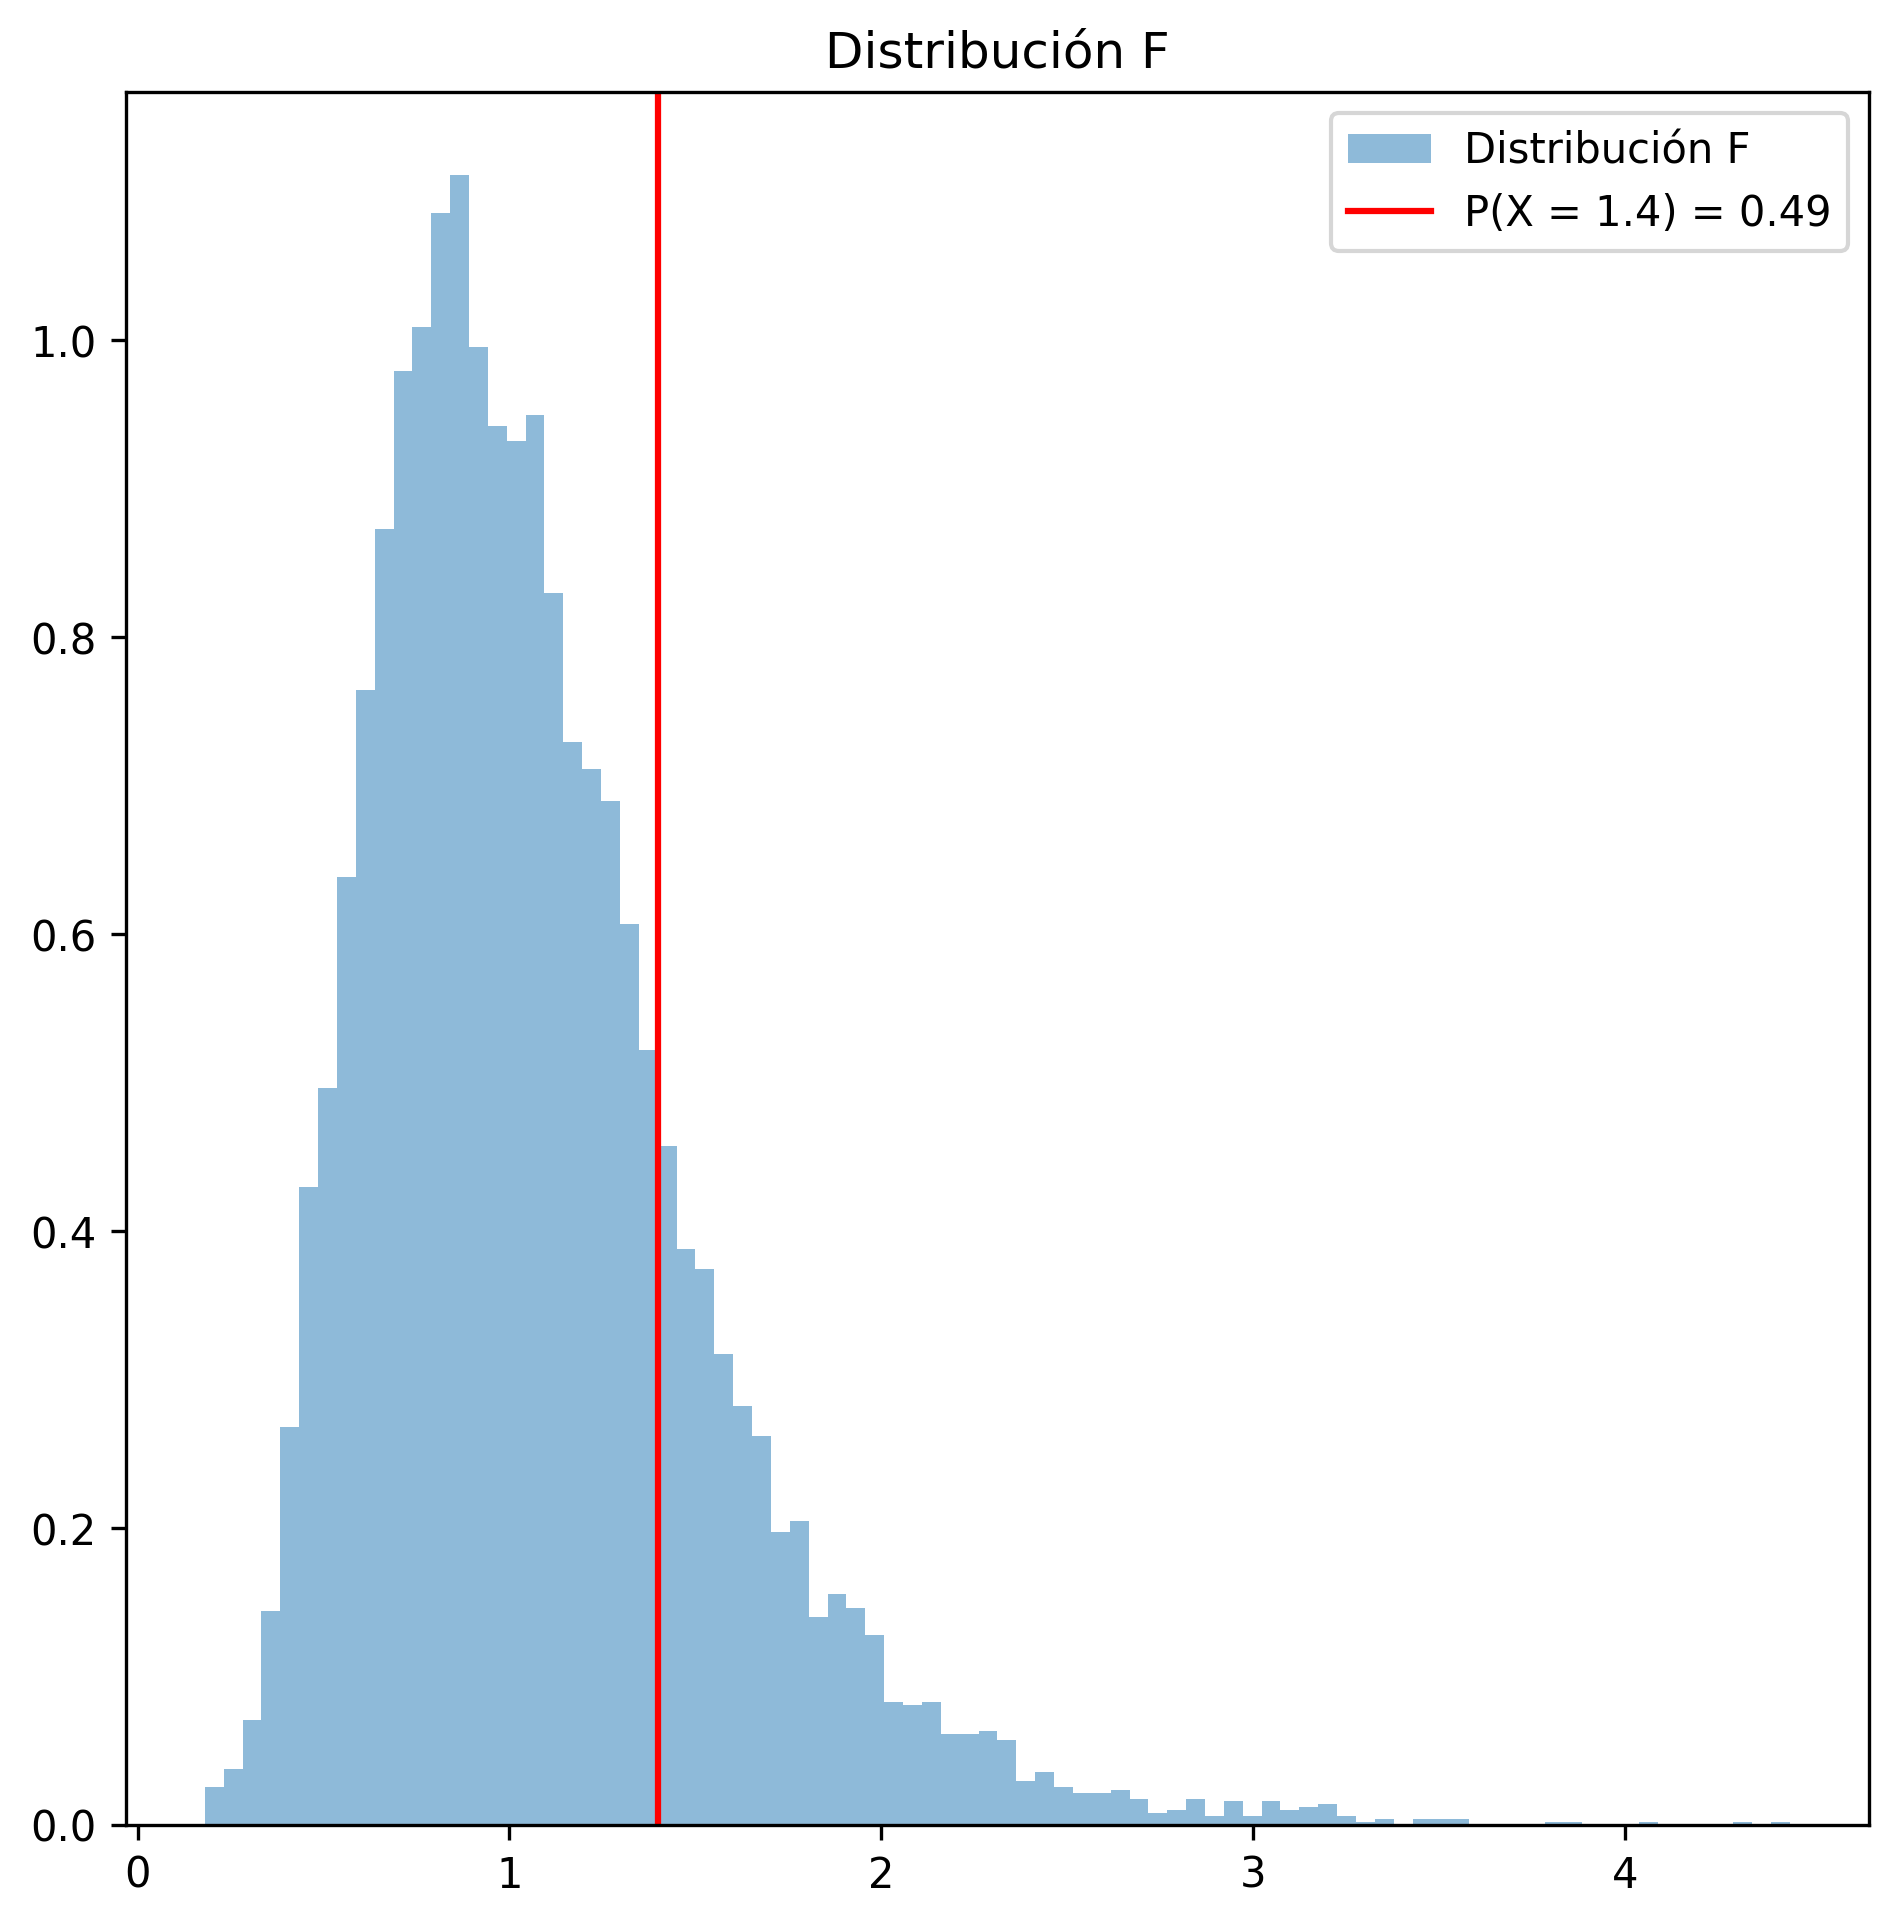

In [ ]:
# calculamos el pdf
prob = st.f.pdf(1.4, dfn = 20, dfd = 30)
rand_f = st.f.rvs(dfn = 20, dfd = 30, size = 10000)
fig, ax = plt.subplots(dpi = 300, figsize = (7.5,7.5))
ax.hist(rand_f, bins = 'auto', density = True, alpha = 0.5, label = 'Distribución F')
ax.axvline(1.4, color = 'red', label = f'P(X = 1.4) = {prob:.2f}')
ax.legend()

ax.set_title('Distribución F')
plt.show()

Calcule la probabilidad de obtener un valor menor o igual a 2.5 a para una distribución f
con df1 = 50 y df2 = 50.

---

Al igual que antes calculamos el cdf con los métodos anteriores.

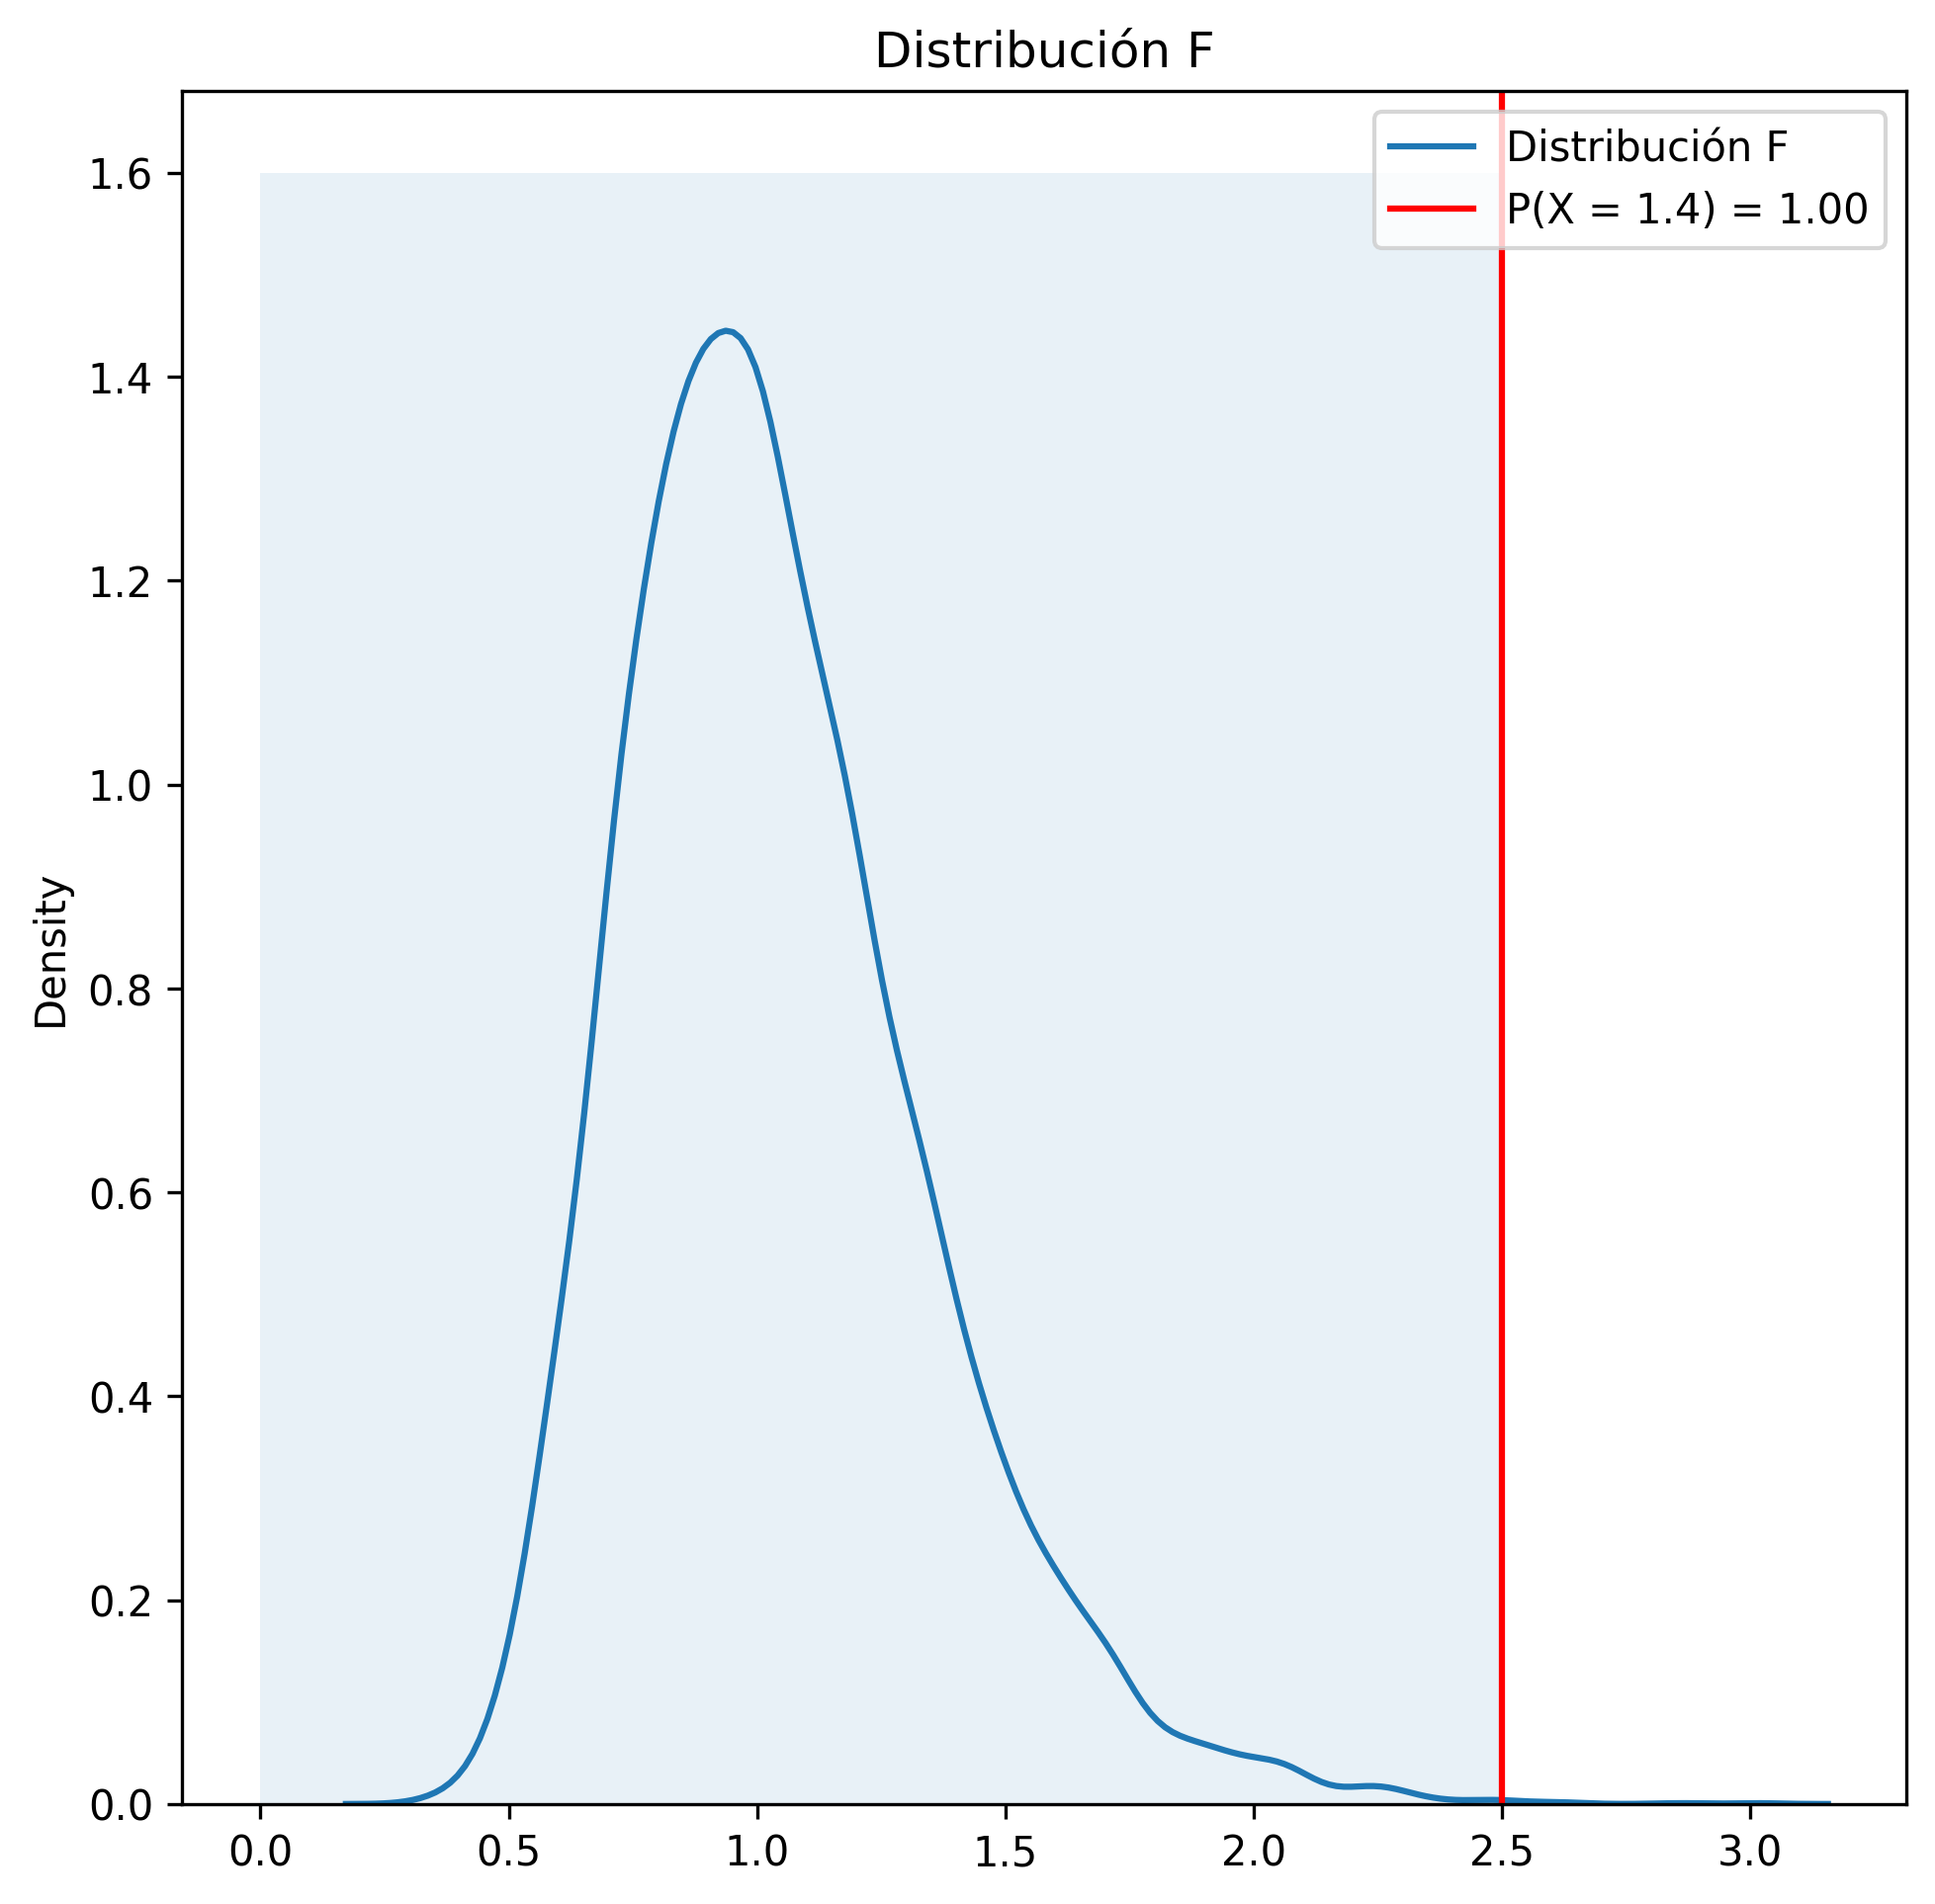

In [ ]:
# calculamos el pdf
prob = st.f.cdf(2.5, dfn = 50, dfd = 50)
rand_f = st.f.rvs(dfn = 50, dfd = 50, size = 10000)
fig, ax = plt.subplots(dpi = 300, figsize = (7.5,7.5))
sns.kdeplot(rand_f, ax = ax, label = 'Distribución F')
ax.axvline(2.5, color = 'red', label = f'P(X = 1.4) = {prob:.2f}')
ax.legend(loc = 'upper right')
ax.set_title('Distribución F')
ax.fill_between(x = [0,2.5], y1 = 0, y2= 1.6, alpha = 0.1, label = f'P(X <= 2.5) = {prob:.2f}' )

plt.show()

Evalue si es posible realizar una prueba t-test o z-test para datos provenientes de una distribución f. Si es posible, para que valor de df 1 y df 2 se puede realizar.

---

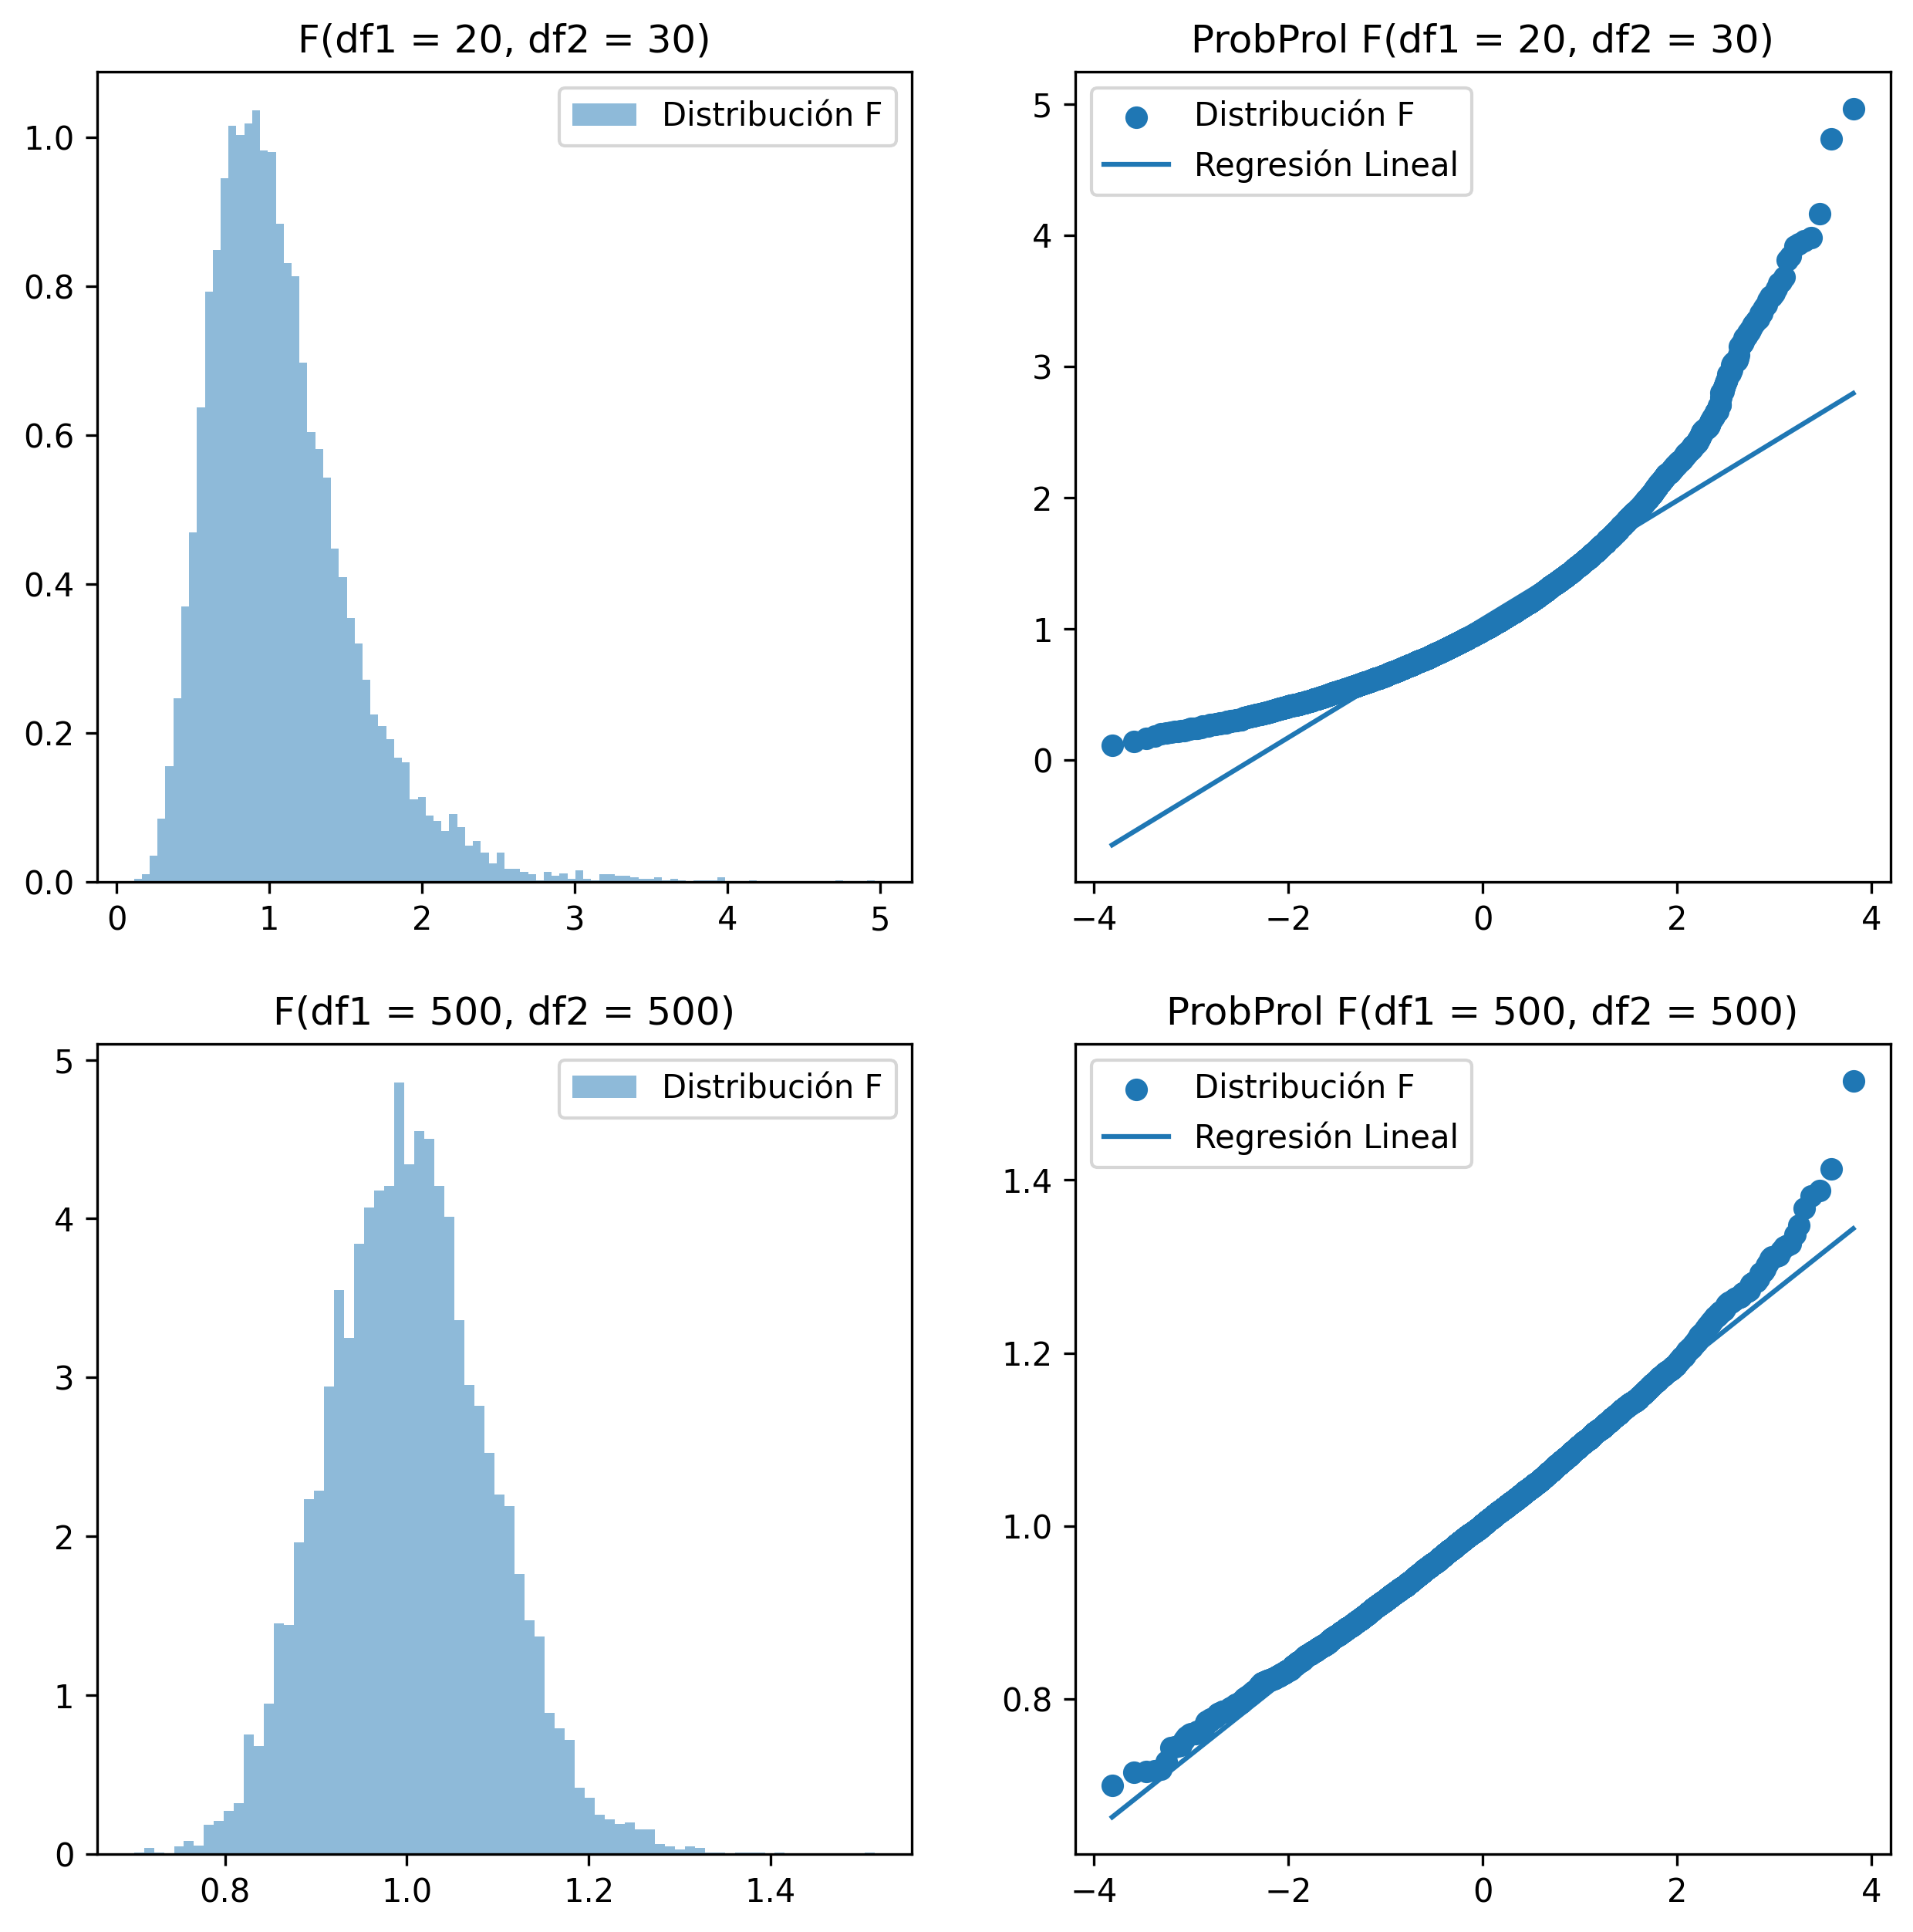

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (10,10), dpi = 300)
f_1 = st.f.rvs(dfn = 20, dfd = 30, size = 10000)
f_2 = st.f.rvs(dfn = 500, dfd = 500, size = 10000)
ax[0,0].hist(f_1, bins = 'auto', density = True, alpha = 0.5, label = 'Distribución F')
ax[0,0].legend()
ax[0,0].set_title('F(df1 = 20, df2 = 30)')
ax[1,0].hist(f_2, bins = 'auto', density = True, alpha = 0.5, label = 'Distribución F')
(osm, osr), (slope, intercept, r) = st.probplot(f_1)
ax[1,0].legend()
ax[1,0].set_title('F(df1 = 500, df2 = 500)')
ax[0,1].scatter(osm, osr, label = 'Distribución F')
ax[0,1].plot(osm, slope * osm + intercept, label = 'Regresión Lineal')
ax[0,1].legend()
ax[0,1].set_title('ProbProl F(df1 = 20, df2 = 30)')
(osm, osr), (slope, intercept, r) = st.probplot(f_2)
ax[1,1].scatter(osm, osr, label = 'Distribución F')
ax[1,1].plot(osm, slope * osm + intercept, label = 'Regresión Lineal')
ax[1,1].legend()
ax[1,1].set_title('ProbProl F(df1 = 500, df2 = 500)')
plt.show()

# Análisis de Datos Categóricos

## 1.

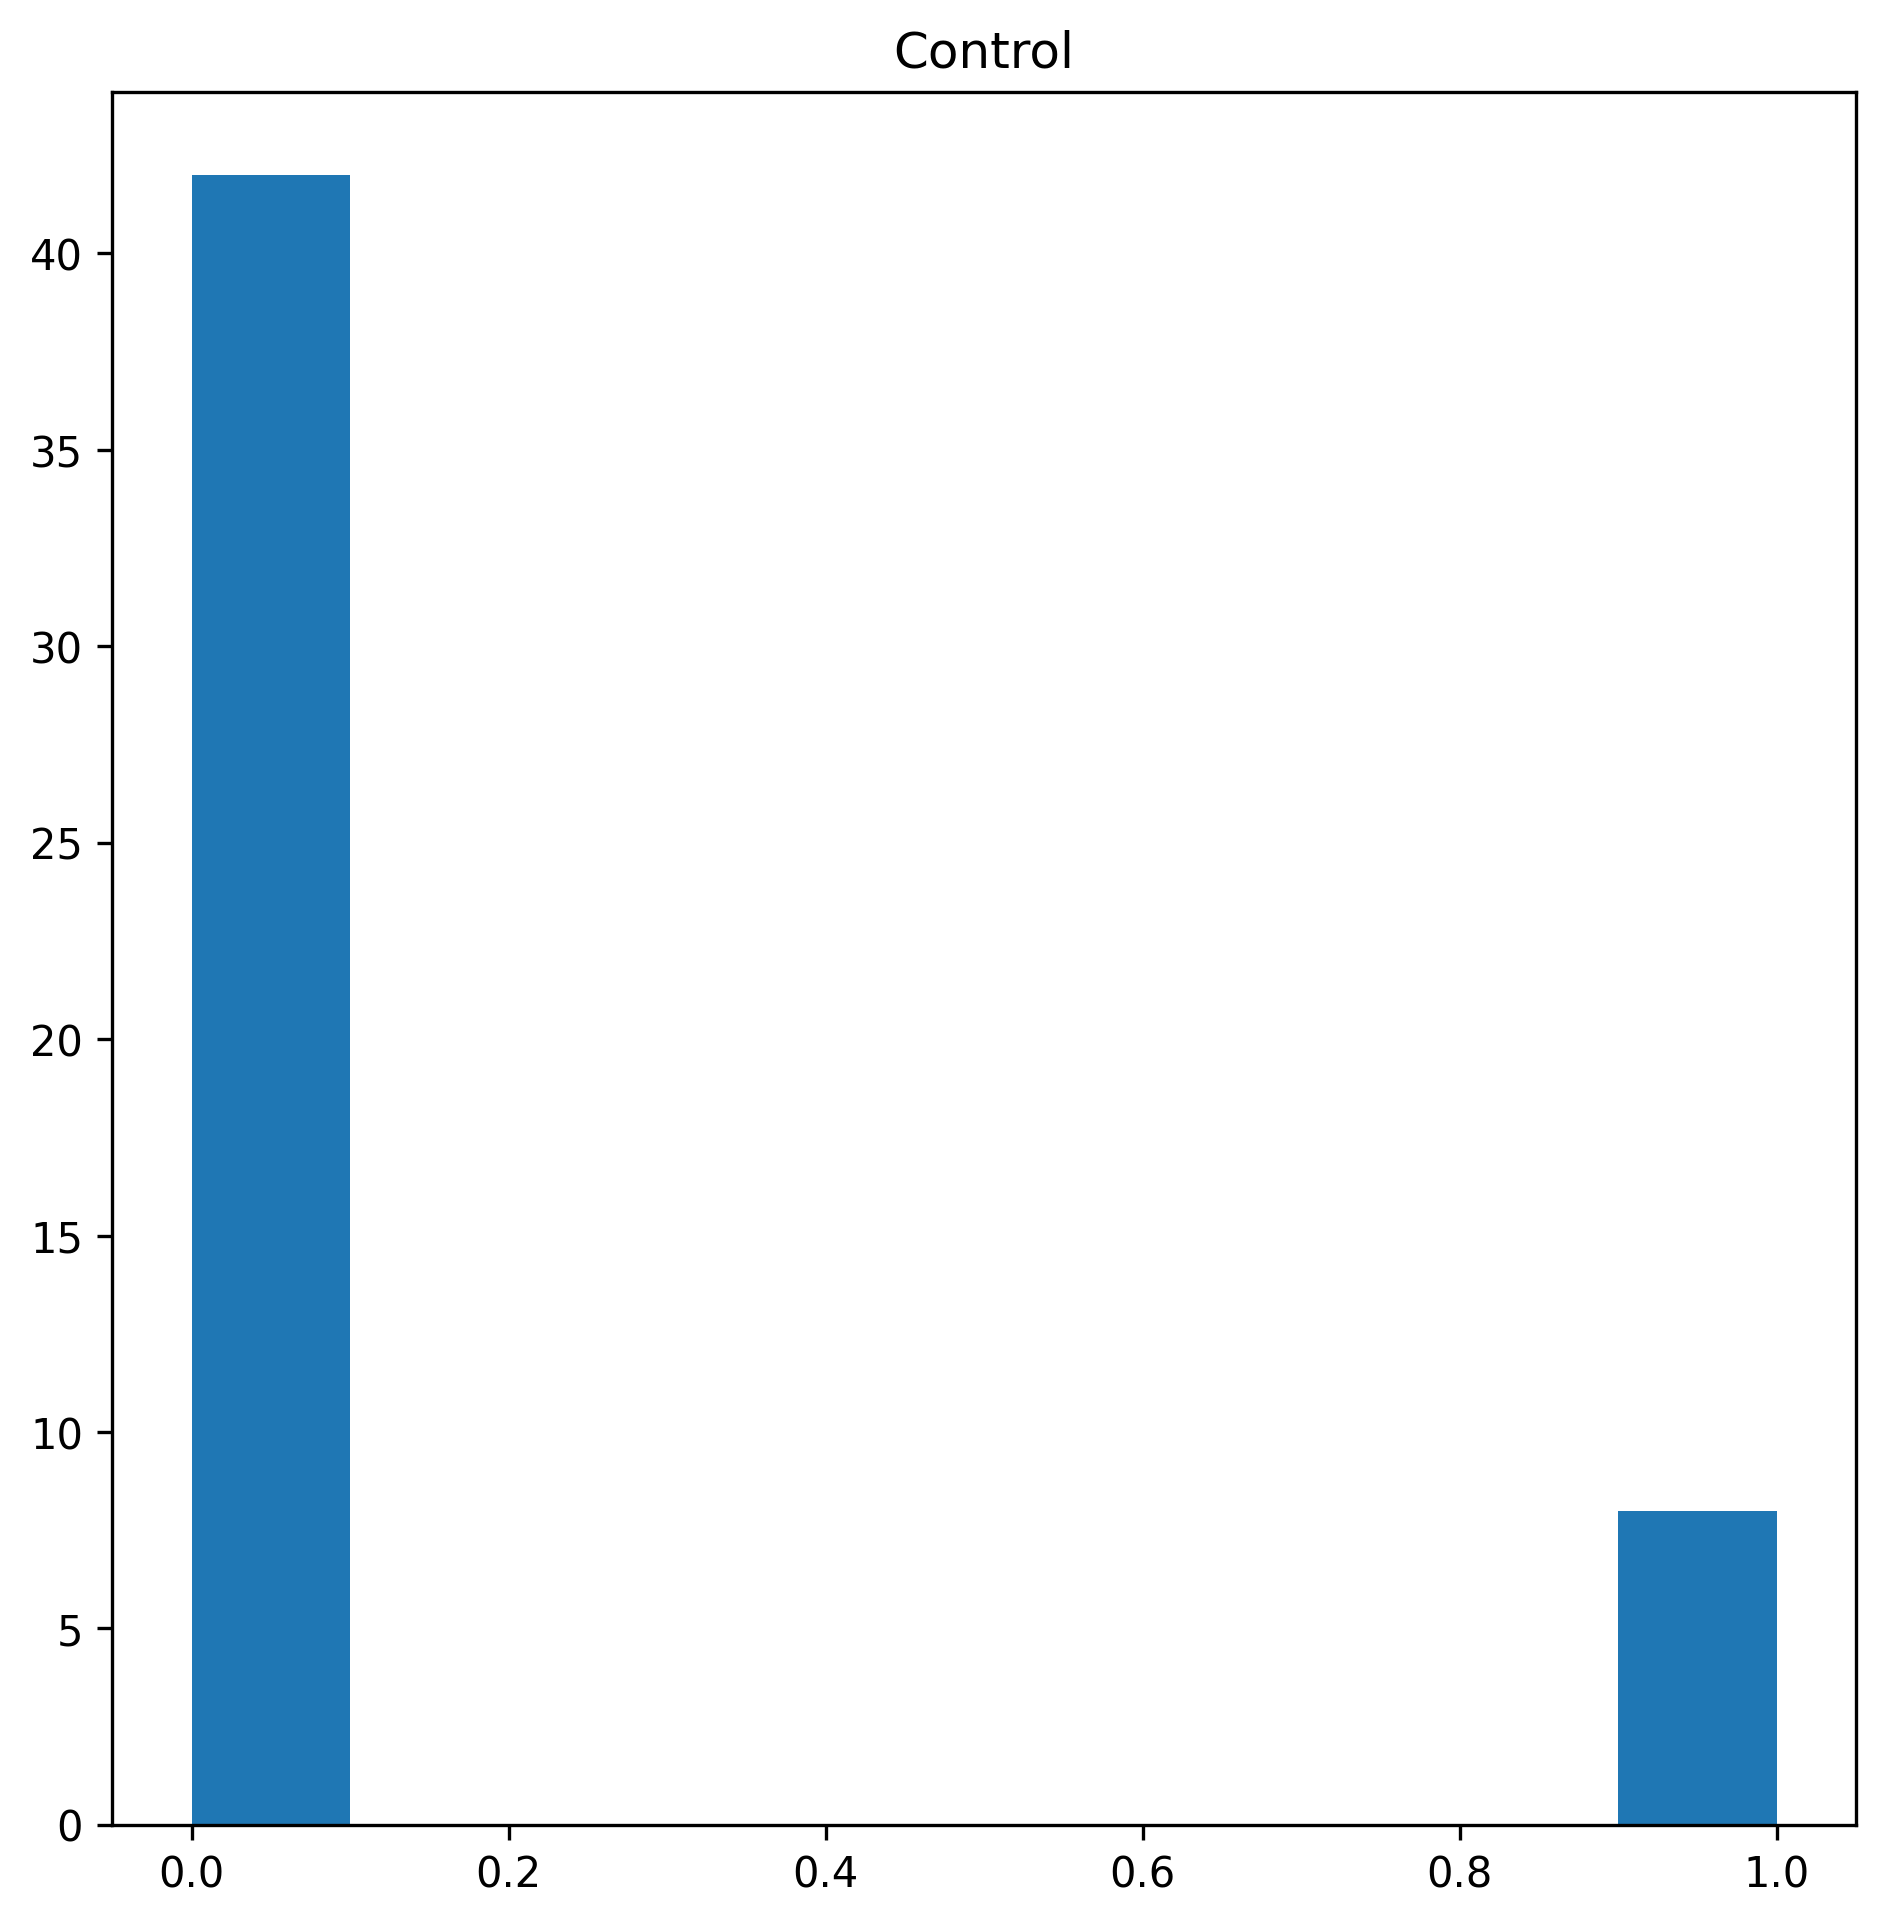

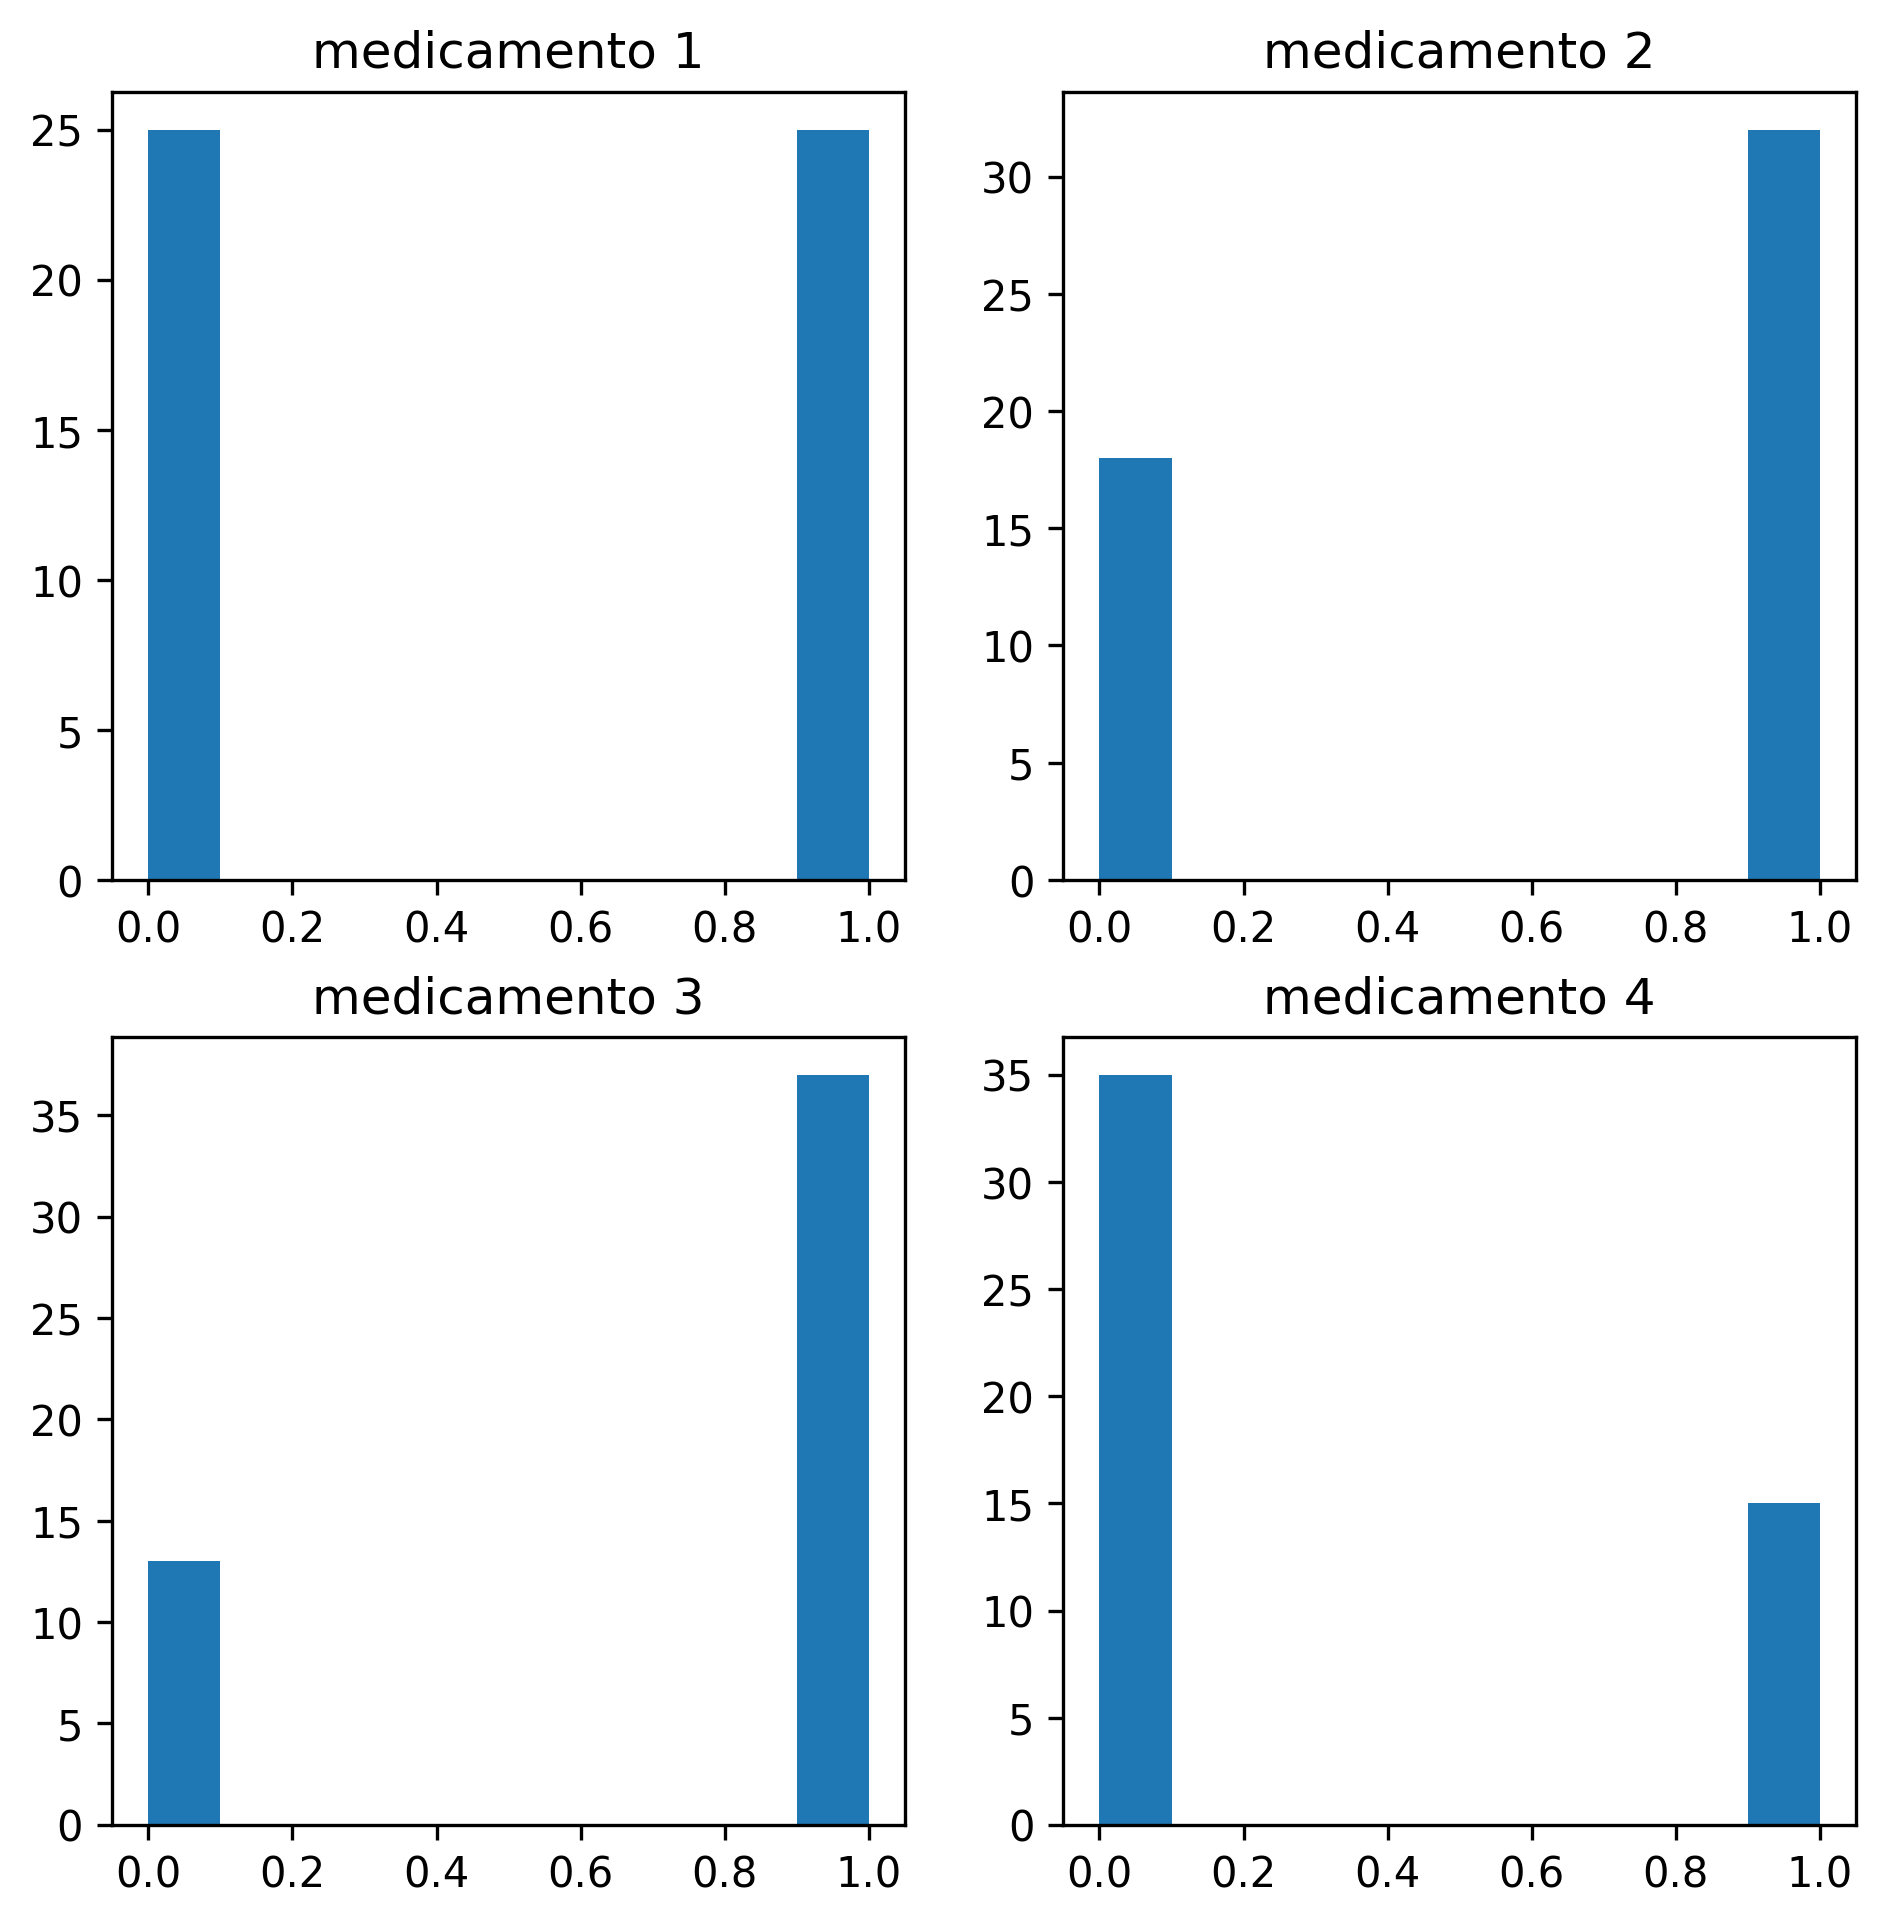

In [ ]:
np.random.seed(42)
control = st.bernoulli.rvs(p = 0.2, size = 50)
medicamento1 = st.bernoulli.rvs(p = 0.5, size = 50)
medicamento2 = st.bernoulli.rvs(p = 0.55, size = 50)
medicamento3 = st.bernoulli.rvs(p = 0.75, size = 50)
medicamento4 = st.bernoulli.rvs(p = 0.3, size = 50)
fig, ax = plt.subplots(dpi = 300, figsize = (7.5,7.5))
ax.hist(control)
ax.set_title('Control')
plt.show()
fig, ax = plt.subplots(2,2,dpi = 300, figsize = (7.5,7.5))
ax[0,0].hist(medicamento1)
ax[0,0].set_title('medicamento 1')
ax[0,1].hist(medicamento2)
ax[0,1].set_title('medicamento 2')
ax[1,0].hist(medicamento3)
ax[1,0].set_title('medicamento 3')
ax[1,1].hist(medicamento4)
ax[1,1].set_title('medicamento 4')
plt.show()

Hipótesis nula y alternativa, estime la
proporción muestral y resporte:
- Valor del estadístico P0.
- Intervalo de confianza del 95% la población.
- Valor-p de la prueba.
- Si rechaza o falla en rechazar la hipótesis nula.
---

En todos los casos las hipótesis se plantean como:
$$
H_0: p_i = 0.5
$$
$$
H_a: p_i > 0.5
$$
Donde $p_i$ es la proporción de la población de la cual provienen los datos.

In [ ]:
import pandas as pd
p0 = 0.5 # estadistico a comparar
n = 50 # cantidad de datos
signifi = 0.05 # significancia alpha = 0.05

# precreamos el dataframe
resultados = pd.DataFrame(index=['p_hat', 'z0', 'CI Low', 'CI Up', 'p-val(Z_0)', 'p-val(Binom)', 'Reject H0'],
                         columns=['control', 'medicamento1', 'medicamento2', 'medicamento3', 'medicamento4'],
                         dtype=object)

# calculamos el p_hat
resultados.loc['p_hat'] = [control.mean(), medicamento1.mean(),
                           medicamento2.mean(), medicamento3.mean(),
                           medicamento4.mean()]

# loop de cada dato
for data, name in zip([control, medicamento1, medicamento2,
                       medicamento3, medicamento4],
                       ['control', 'medicamento1', 'medicamento2',
                        'medicamento3', 'medicamento4']
                    ):
    p_hat= resultados.loc['p_hat', name]
    # calculamos el estadístico de la prueba
    z0 = (p_hat - p0) / np.sqrt(p0 * (1-p0)/n)
    resultados.loc['z0', name] = z0
    # CI inferior
    ci_up = p_hat + st.norm.ppf(1 - 0.05/2) * np.sqrt((p_hat*(1-p_hat))/(n))
    # CI sup
    ci_low = p_hat - st.norm.ppf(1 - 0.05/2) * np.sqrt((p_hat*(1-p_hat))/(n))

    resultados.loc['CI Low', name] = ci_low
    resultados.loc['CI Up', name] = ci_up
    # valor p
    resultados.loc['p-val(Z_0)', name] = 1 - st.norm.cdf(z0)
    resultados.loc['p-val(Binom)', name] = st.binomtest(data.sum(), n = n, p = p0, alternative = 'greater').pvalue
    # prueba de la hipótesis
    if resultados.loc['p-val(Z_0)', name] < signifi:
        resultados.loc['Reject H0', name] = 'Reject H0'
    else:
        resultados.loc['Reject H0', name] = 'Fail to Reject H0'

resultados.T

,p_hat,z0,CI Low,CI Up,p-val(Z_0),p-val(Binom),Reject H0
control,0.16,-4.808326,0.058384,0.261616,0.999999,1.0,Fail to Reject H0
medicamento1,0.5,0.0,0.36141,0.63859,0.5,0.556138,Fail to Reject H0
medicamento2,0.64,1.979899,0.506953,0.773047,0.023857,0.032454,Reject H0
medicamento3,0.74,3.394113,0.618419,0.861581,0.000344,0.000468,Reject H0
medicamento4,0.3,-2.828427,0.17298,0.42702,0.997661,0.998699,Fail to Reject H0


## 2.

Compare cada grupo de tratamiento con el grupo de control para determinar si existe evidencia estadística suficiente que permita afirmar que la proporción de éxito es mayor en cada tratamiento respecto al control. Indique cuáles de sus medicamentos posee una diferencia significativa con el grupo control.

---

En este caso se debe realizar un método similar al anterior, pero en este caso, se compara con la muestra control.

En cada caso, las hipótesis son:

$$
H_0: p_i = p_c
$$
$$
H_a: p_i > p_c
$$

Donde $p_c$ es la proporción del grupo control.

In [ ]:
class PropTest2Samp:
    '''
    Prueba de hipótesis para dos proporciones. Basado en la aproximación normal de una binomial.
    ---
    Parámetros:
        dato1 : array_like
            Primera muestra de datos.
        dato2 : array_like
            Segunda muestra de datos.
        alpha : float, optional
            Nivel de significancia para el test. Por defecto es 0.05.
        alternative : str, optional
            Tipo de test de hipótesis a realizar. Puede ser 'two-sided', 'larger' o 'smaller'.
            Por defecto es 'two-sided'.
    ---
    Retorna:
    Por medio de los atributos de la clase
        z : float
            Valor del estadístico z.
        p_value : float
            Valor p del test.
    ---
    Métodos:
        gen_counts() : None
            Genera los conteos y proporciones de las muestras.
        proptest2s() : None
            Realiza la prueba de hipótesis para dos proporciones.
        confidence_interval(conf = 0.95) : tuple
            Calcula el intervalo de confianza para la diferencia de proporciones.
        beta() : float
            Calcula el valor beta (1 - poder estadístico) del test.
    ---
    Ejemplo:
    >>> count = np.array([27, 19])
    >>> nobs = np.array([100, 100])
    >>> # paramos a datos
    >>> dato1 = [1] * count[0] + [0] * (nobs[0] - count[0])
    >>> dato2 = [1] * count[1] + [0] * (nobs[1] - count[1])
    >>> proptest = PropTest2Samp(dato1, dato2, alpha = 0.05, alternative = 'two-sided')
    >>> print(f'z-crítico: { proptest.z:.2f}')
    >>> print(f'p-value: { proptest.p_value:.2f}')
    '''
    def __init__(self, dato1, dato2 = None, alpha = 0.05, alternative = 'two-sided'):
        self._dato1 = dato1
        self._dato2 = dato2
        self._alpha = alpha
        self._alternative = alternative
        self.gen_counts()
        self.proptest2s()
    def gen_counts(self):
        '''
        Función que genera los conteos y proporciones de las muestras.
        '''
        self._pos1 = np.sum(self._dato1)
        self._pos2 = np.sum(self._dato2)
        self._n1 = len(self._dato1)
        self._n2 = len(self._dato2)
        self._p1 = self._pos1/self._n1
        self._p2 = self._pos2/self._n2
        self._p =( self._pos1 + self._pos2 ) / (self._n1 + self._n2)
    def proptest2s(self):
        '''
        Función que realiza la prueba de hipótesis para dos proporciones.
        Se basa en la aproximación normal de una binomial.
        '''
        # calculamos el estadístico z
        self.z = (self._p1 - self._p2) / np.sqrt(self._p * (1 - self._p) * (1/self._n1 + 1/self._n2))
        # calculamos el valor p dependiendo del tipo de prueba
        # de hipótesis

        # dos colas
        if self._alternative == 'two-sided':
            self.p_value = 2 * (1 - st.norm.cdf(np.abs(self.z)))
        # una cola >
        elif self._alternative == 'larger':
            self.p_value = 1 - st.norm.cdf(self.z)
        # una cola <
        elif self._alternative == 'smaller':
            self.p_value = st.norm.cdf(self.z)
        else:
            raise ValueError("El valor de 'alternative' debe ser 'two-sided', 'larger' o 'smaller'.")

        # no retornamos nada, los resultados se guardan en los atributos de la clase
        # self.p_value = p_value
        # self.z = z
    def confidence_interval(self, conf = 0.95):
        '''
        Función que calcula el intervalo de confianza para la diferencia de proporciones.
        ---
        Parámetros:
            conf : float, optional
                Nivel de confianza para el intervalo. Por defecto es 0.95.
        ---
        Retorna:
            lower_bound : float
                Límite inferior del intervalo de confianza.
            upper_bound : float
                Límite superior del intervalo de confianza.
        '''
        alpha = 1 - conf # calculamos el nivel de significancia
        z_alpha2 = st.norm.ppf(1 - alpha/2) # z crítico para dos colas
        sigma_p1_p2 = np.sqrt(
            ((self._p1 * (1-self._p1)) / (self._n1)) + ((self._p2 * (1 - self._p2))/(self._n2)) # varianza
        )
        diff = self._p1 - self._p2
        lower_bound = diff - z_alpha2 * sigma_p1_p2
        upper_bound = diff + z_alpha2 * sigma_p1_p2
        return lower_bound, upper_bound
    def beta(self, alpha):
        '''
        Función que calcula el valor beta (1 - poder estadístico) del test.
        ---
        Retorna:
            beta : float
                Valor beta del test.
        '''
        phat = ( self._n1 * self._p1 + self._n2 * self._p2 )/(self._n1 + self._n2)
        qhat = ( self._n1 * (1 - self._p1) + self._n2 * (1 - self._p2) ) / (self._n1 + self._n2)
        sigma_p1_p2 = np.sqrt(
            ((self._p1 * (1-self._p1)) / (self._n1)) + ((self._p2 * (1 - self._p2))/(self._n2))
        )
        if self._alternative == 'two-sided':

            z_alpha2 = st.norm.ppf(1 - alpha/2)
            numerator = z_alpha2 * np.sqrt(
                (phat * qhat) * (1/self._n1 + 1/self._n2)
            ) - (self._p1 - self._p2)
            beta = st.norm.cdf(numerator/sigma_p1_p2) + st.norm.cdf(-numerator/sigma_p1_p2)
        elif self._alternative == 'larger':
            z_alpha = st.norm.ppf(1 - alpha)
            numerator = z_alpha * np.sqrt(
                (phat * qhat) * (1/self._n1 + 1/self._n2)
            ) - (self._p1 - self._p2)
            beta = st.norm.cdf(numerator/sigma_p1_p2)
        elif self._alternative == 'smaller':
            z_alpha = st.norm.ppf(alpha)
            numerator = z_alpha * np.sqrt(
                (phat * qhat) * (1/self._n1 + 1/self._n2)
            ) - (self._p1 - self._p2)
            beta = st.norm.cdf(-numerator/sigma_p1_p2)
        else:
            raise ValueError("El valor de 'alternative' debe ser 'two-sided', 'larger' o 'smaller'.")
        return beta

    def samplesize(self, beta, alpha):
        '''
        Función que calcula el tamaño de muestra necesario para alcanzar un poder estadístico deseado.
        Y la hipótesis alternativa realizada.
        ---
        Parámetros:
            beta : float
                Valor beta (1 - poder estadístico) deseado.
            alpha : float
                Nivel de significancia deseado.
        ---
        Retorna:
            n : int
                Tamaño de muestra necesario.
        '''
        q1 = 1 - self._p1
        q2 = 1 - self._p2
        z_beta = st.norm.ppf(1 - beta)
        den = (self._p1 - self._p2) ** 2
        num_1 = np.sqrt(
            (self._p1 + self._p2)*(q1+q2) * 1/2
        )
        num2 = np.sqrt(
            (self._p1 * q1)  + (self._p2 * q2)
        )

        if self._alternative == 'two-sided':
            z_alpha = st.norm.ppf(1 - alpha/2)
        elif self._alternative == 'larger':
            z_alpha = st.norm.ppf(1 - alpha)
        elif self._alternative == 'smaller':
            z_alpha = st.norm.ppf(alpha)
        else:
            raise ValueError("El valor de 'alternative' debe ser 'two-sided', 'larger' o 'smaller'.")
        n = ((z_alpha*num_1 + z_beta*num2) ** 2) / den
        n = np.ceil(n)
        n = int(n)
        if n < 0:
            raise ValueError("El tamaño de muestra no puede ser negativo.")
        return n

In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
p_c = np.mean(control)
n = 50 # cantidad de datos
signifi = 0.05 # significancia alpha = 0.05

# precreamos el dataframe
resultados = pd.DataFrame(index=['p_hat', 'z0', 'CI Low', 'CI Up', 'p-val(Z_0)', 'Reject H0'],
                         columns=['medicamento1', 'medicamento2', 'medicamento3', 'medicamento4'],
                         dtype=object)


# calculamos el p_hat
resultados.loc['p_hat'] = [medicamento1.mean(),
                           medicamento2.mean(), medicamento3.mean(),
                           medicamento4.mean()]
# loop de cada dato
for data, name in zip([medicamento1, medicamento2,
                       medicamento3, medicamento4],
                       ['medicamento1', 'medicamento2',
                        'medicamento3', 'medicamento4']
                    ):
    # calculamos el p_i
    p_i = resultados.loc['p_hat', name]

    # realizamos el prop test de dos muestras
    prop_test_i = PropTest2Samp(data, control,
                                alpha = 0.05, alternative = 'larger')
    # obtenemos el estadístico
    z_i = prop_test_i.z
    resultados.loc['z0', name] = z_i

    # intervalos de confianza
    ci_low, ci_up = prop_test_i.confidence_interval()
    resultados.loc['CI Low', name] = ci_low
    resultados.loc['CI Up', name] = ci_up

    # Valor p
    resultados.loc['p-val(Z_0)', name] = prop_test_i.p_value
    if resultados.loc['p-val(Z_0)', name] < signifi:
        resultados.loc['Reject H0', name] = 'Reject H0'

    else:
        resultados.loc['Reject H0', name] = 'Fail to Reject H0'

resultados.T


,p_hat,z0,CI Low,CI Up,p-val(Z_0),Reject H0
medicamento1,0.5,3.615385,0.168148,0.511852,0.00015,Reject H0
medicamento2,0.64,4.898979,0.312586,0.647414,0.0,Reject H0
medicamento3,0.74,5.829219,0.421546,0.738454,0.0,Reject H0
medicamento4,0.3,1.66337,-0.022665,0.302665,0.048119,Reject H0


## 3
Entre los tratamientos que muestran mayor efectividad, seleccione aquellos que deben avanzar a estudios en humanos. Compare los medicamentos entre sí e identifique el tratamiento
con mayor eficacia relativa dentro del conjunto de medicamentos probados.

---

Para este tipo de estudios es necesario comparar cada muestra con la siguiente. Para esto es necesario realizar pairwise comparisons.

In [ ]:
pairwise_comp = pd.DataFrame(index = [1,2,3,4],columns = [1,2,3,4])
data = [medicamento1, medicamento2, medicamento3, medicamento4]
for i in pairwise_comp.columns:
    for j in pairwise_comp.index:
        data1 = data[i-1]
        data2 = data[j-1]
        #
        # H_0: p_1 = p_2
        # H_a: p_1 > p_2
        #
        pairwise_comp.loc[i,j] = PropTest2Samp(data1, data2,
                                               alpha = 0.05,
                                               alternative = 'larger').p_value
pairwise_comp
#

,1,2,3,4
1,0.5,0.921308,0.993287,0.020613
2,0.078692,0.5,0.860173,0.000329
3,0.006713,0.139827,0.5,0.000005
4,0.979387,0.999671,0.999995,0.5


Podemos ver que es mayor a 1, 4. Y que 2 es mayor a 1 y 4. Pero hay una mayor incertidumbre entre 2 y 3.

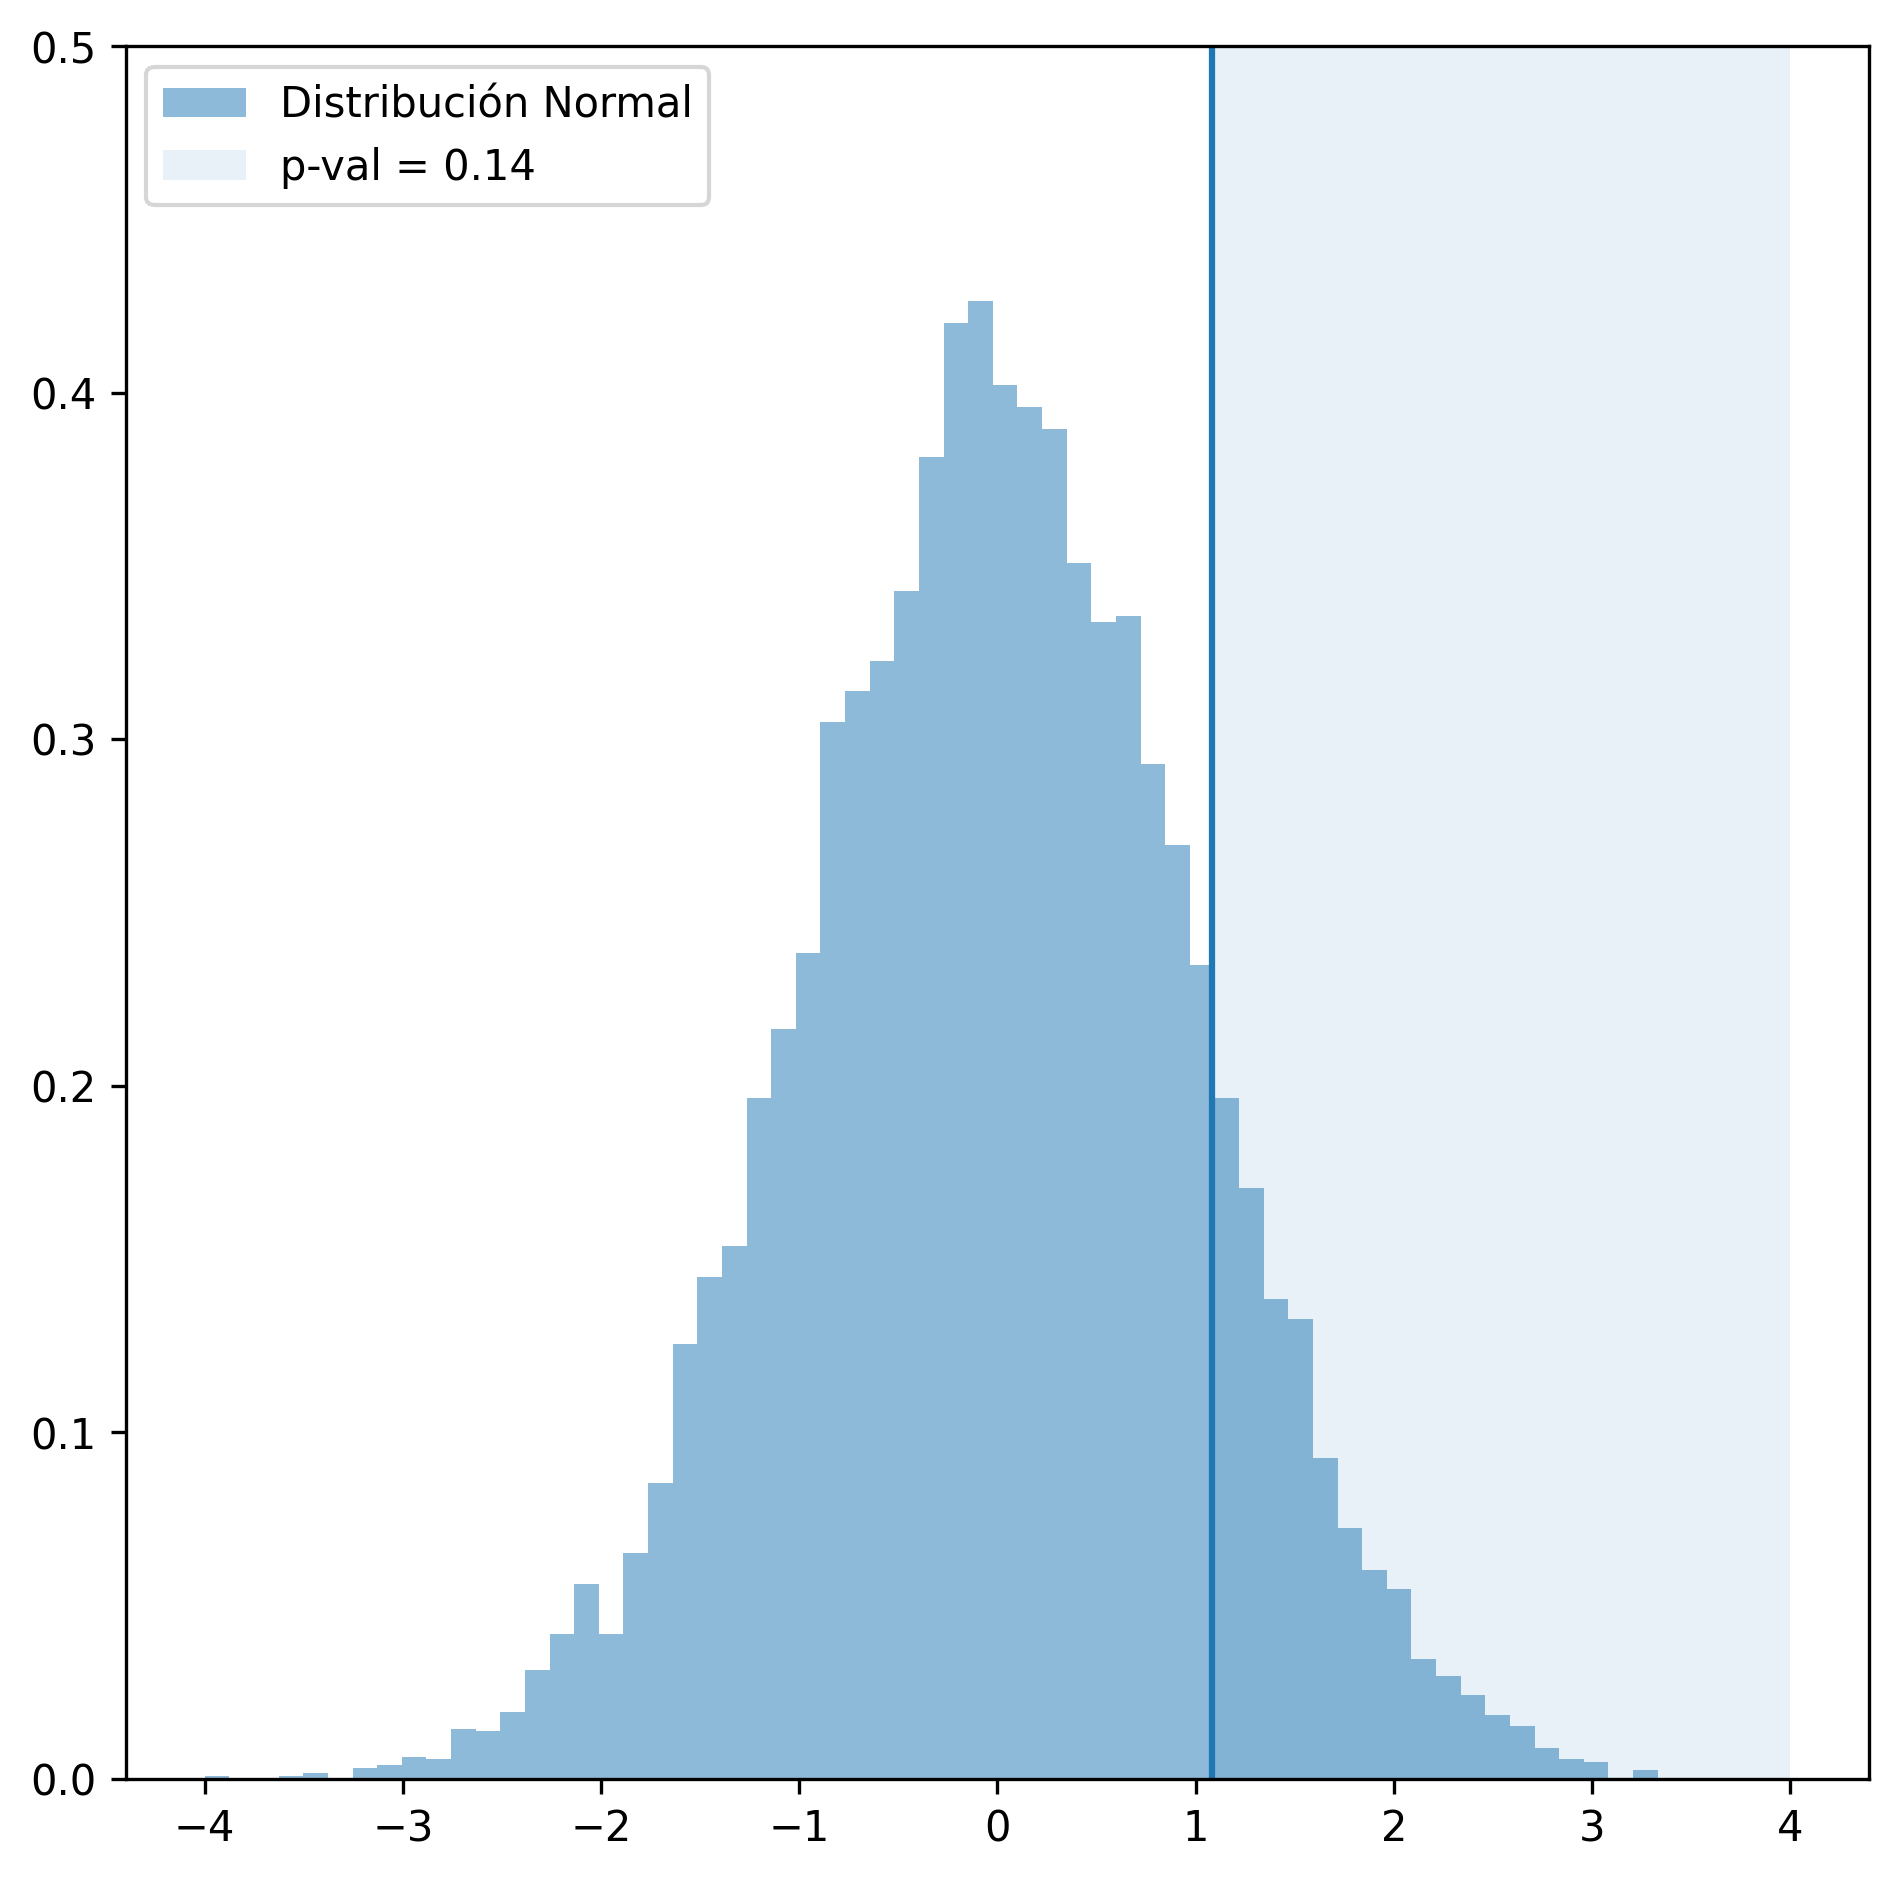

In [ ]:
pro32 = PropTest2Samp(medicamento3, medicamento2, alpha = 0.05, alternative = 'larger')

fig, ax = plt.subplots(dpi = 300, figsize = (7.5,7.5))
norm_data = st.norm.rvs(size = 10000)
ax.hist(norm_data, bins = 'auto', density = True, alpha = 0.5, label = 'Distribución Normal')
ax.axvline(pro32.z)
ax.fill_between(x = [pro32.z,4], y1 = 0, y2 = 0.5, alpha = 0.1,
                label = f'p-val = {pro32.p_value:.2f}')
ax.set_ylim(0, 0.5)
ax.legend()




# ANOVA

## 1.

Genere visualizaciones apropiadas que permitan comparar los rendimientos entre los tratamientos. A simple vista ¿Es posible observar diferencias significativas en los diferentes
tratamientos?


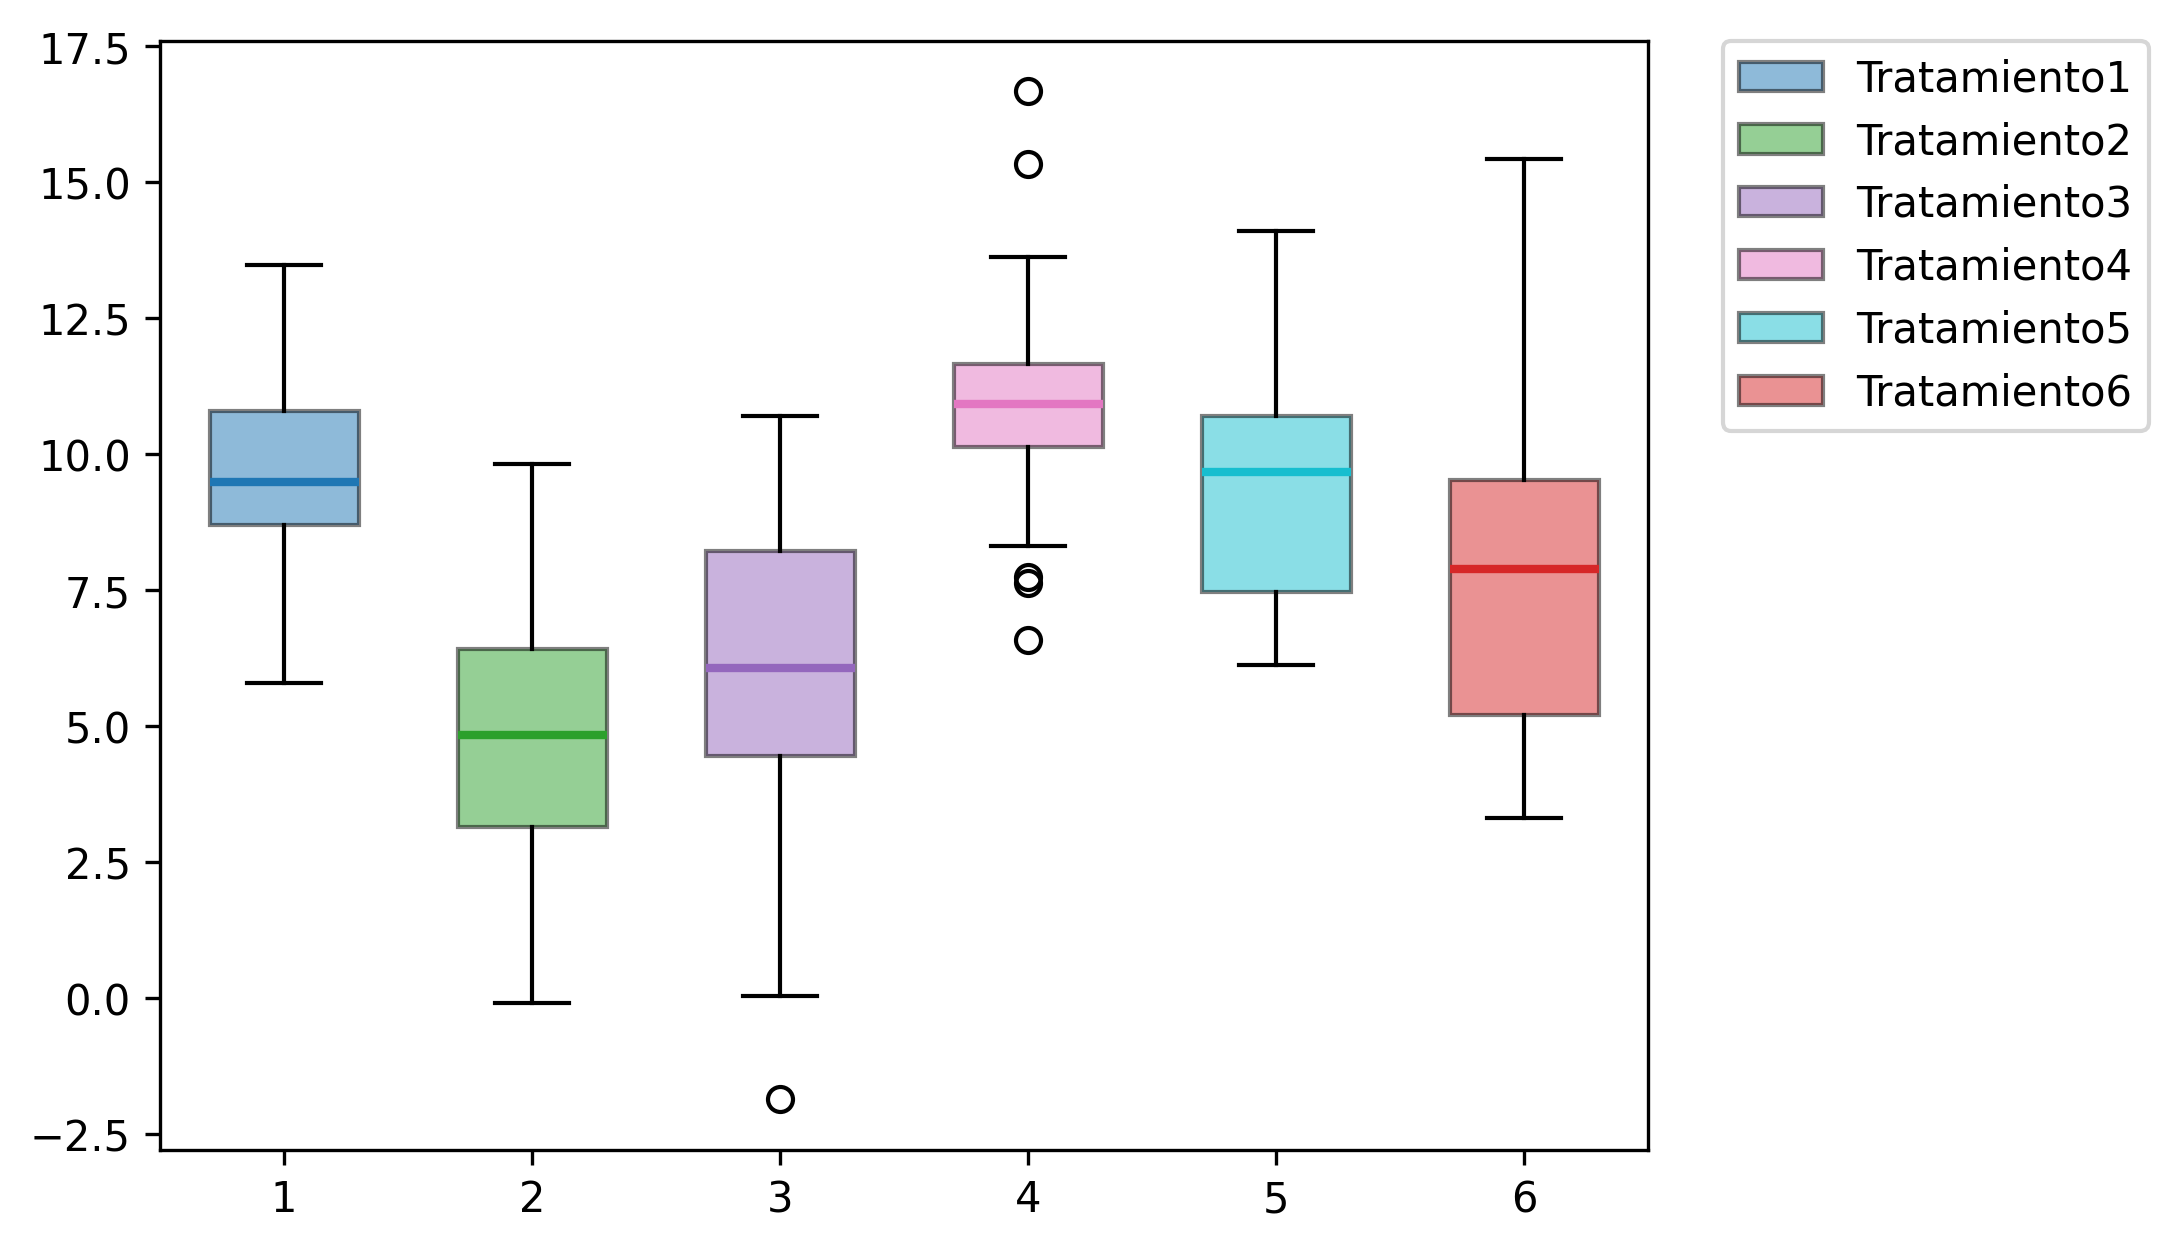

In [ ]:
# Datos

np.random.seed(42)
tratamiento1 = st.norm.rvs(loc = 10, scale = 2.2, size = 30)
tratamiento2 = st.norm.rvs(loc = 5, scale = 2.6, size = 30)
tratamiento3 = st.norm.rvs(loc = 6, scale = 3, size = 30)
tratamiento4 = st.norm.rvs(loc = 11, scale = 2.3, size = 30)
tratamiento5 = st.norm.rvs(loc = 9.5, scale = 2.1, size = 30)
tratamiento6 = st.norm.rvs(loc = 7, scale = 3.1, size = 30)
fig, ax = plt.subplots(dpi = 300)
colors = ['tab:blue', 'tab:green', 'tab:purple', 'tab:pink', 'tab:cyan', 'tab:red']
for i, trat in enumerate([tratamiento1, tratamiento2, tratamiento3, tratamiento4, tratamiento5, tratamiento6]):
    ax.boxplot(
        trat,
        positions = [i],
        widths = 0.6,
        patch_artist = True,
        boxprops = dict( facecolor = colors[i], alpha = 0.5),
        medianprops = dict(color = colors[i], linewidth = 2),
        label = 'Tratamiento' + str(i+1)
    )
ax.set_xticklabels([1,2,3,4,5,6])
ax.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)



## 2.
En base a la visualización anterior, que puede afirmar con respecto a la varianza que posee cada grupo. Realice una prueba estadística que le permita evaluar si la varianza entre grupos es la misma o no. ¿Qué consecuencias tiene la homocedasticidad y heterocedasticidad en un test ANOVA?

---

En este caso debemos realizar un test de Levene. Este test permite evaluar si dos o más muestras poseen la misma varianza.

In [ ]:
levene = st.levene(tratamiento1, tratamiento2, tratamiento3,
                   tratamiento4, tratamiento5, tratamiento6)
print(f'p-value: {levene.pvalue}')

p-value: 0.1531576663377439


La homocedasticidad de la prueba ANOVA viene del hecho de que en la hipótesis nula se asume que cada muestra viene de una misma población. La comparación de dos estimadores de la varianza poblacional (MSE y MStreatment) hace que cuando no se cumpla homocedasticidad, las conclusiones pueden ser erroneas.


## 3.

Aplique tanto una metodología visual como un test de hipótesis para verificar si los datos en cada grupo siguen una distribución normal. ¿Qué consecuencias tiene en el test ANOVA
la utilización de datos no-normales?

---

En esta caso aplicamos el test de Shapiro-Wilk, el cual es un test de hipótesis que permite definir si una muestra proviene de una distribución normal. En particular, la hipótesis nula define que los datos son normales, y la alternativa que son no-normales.

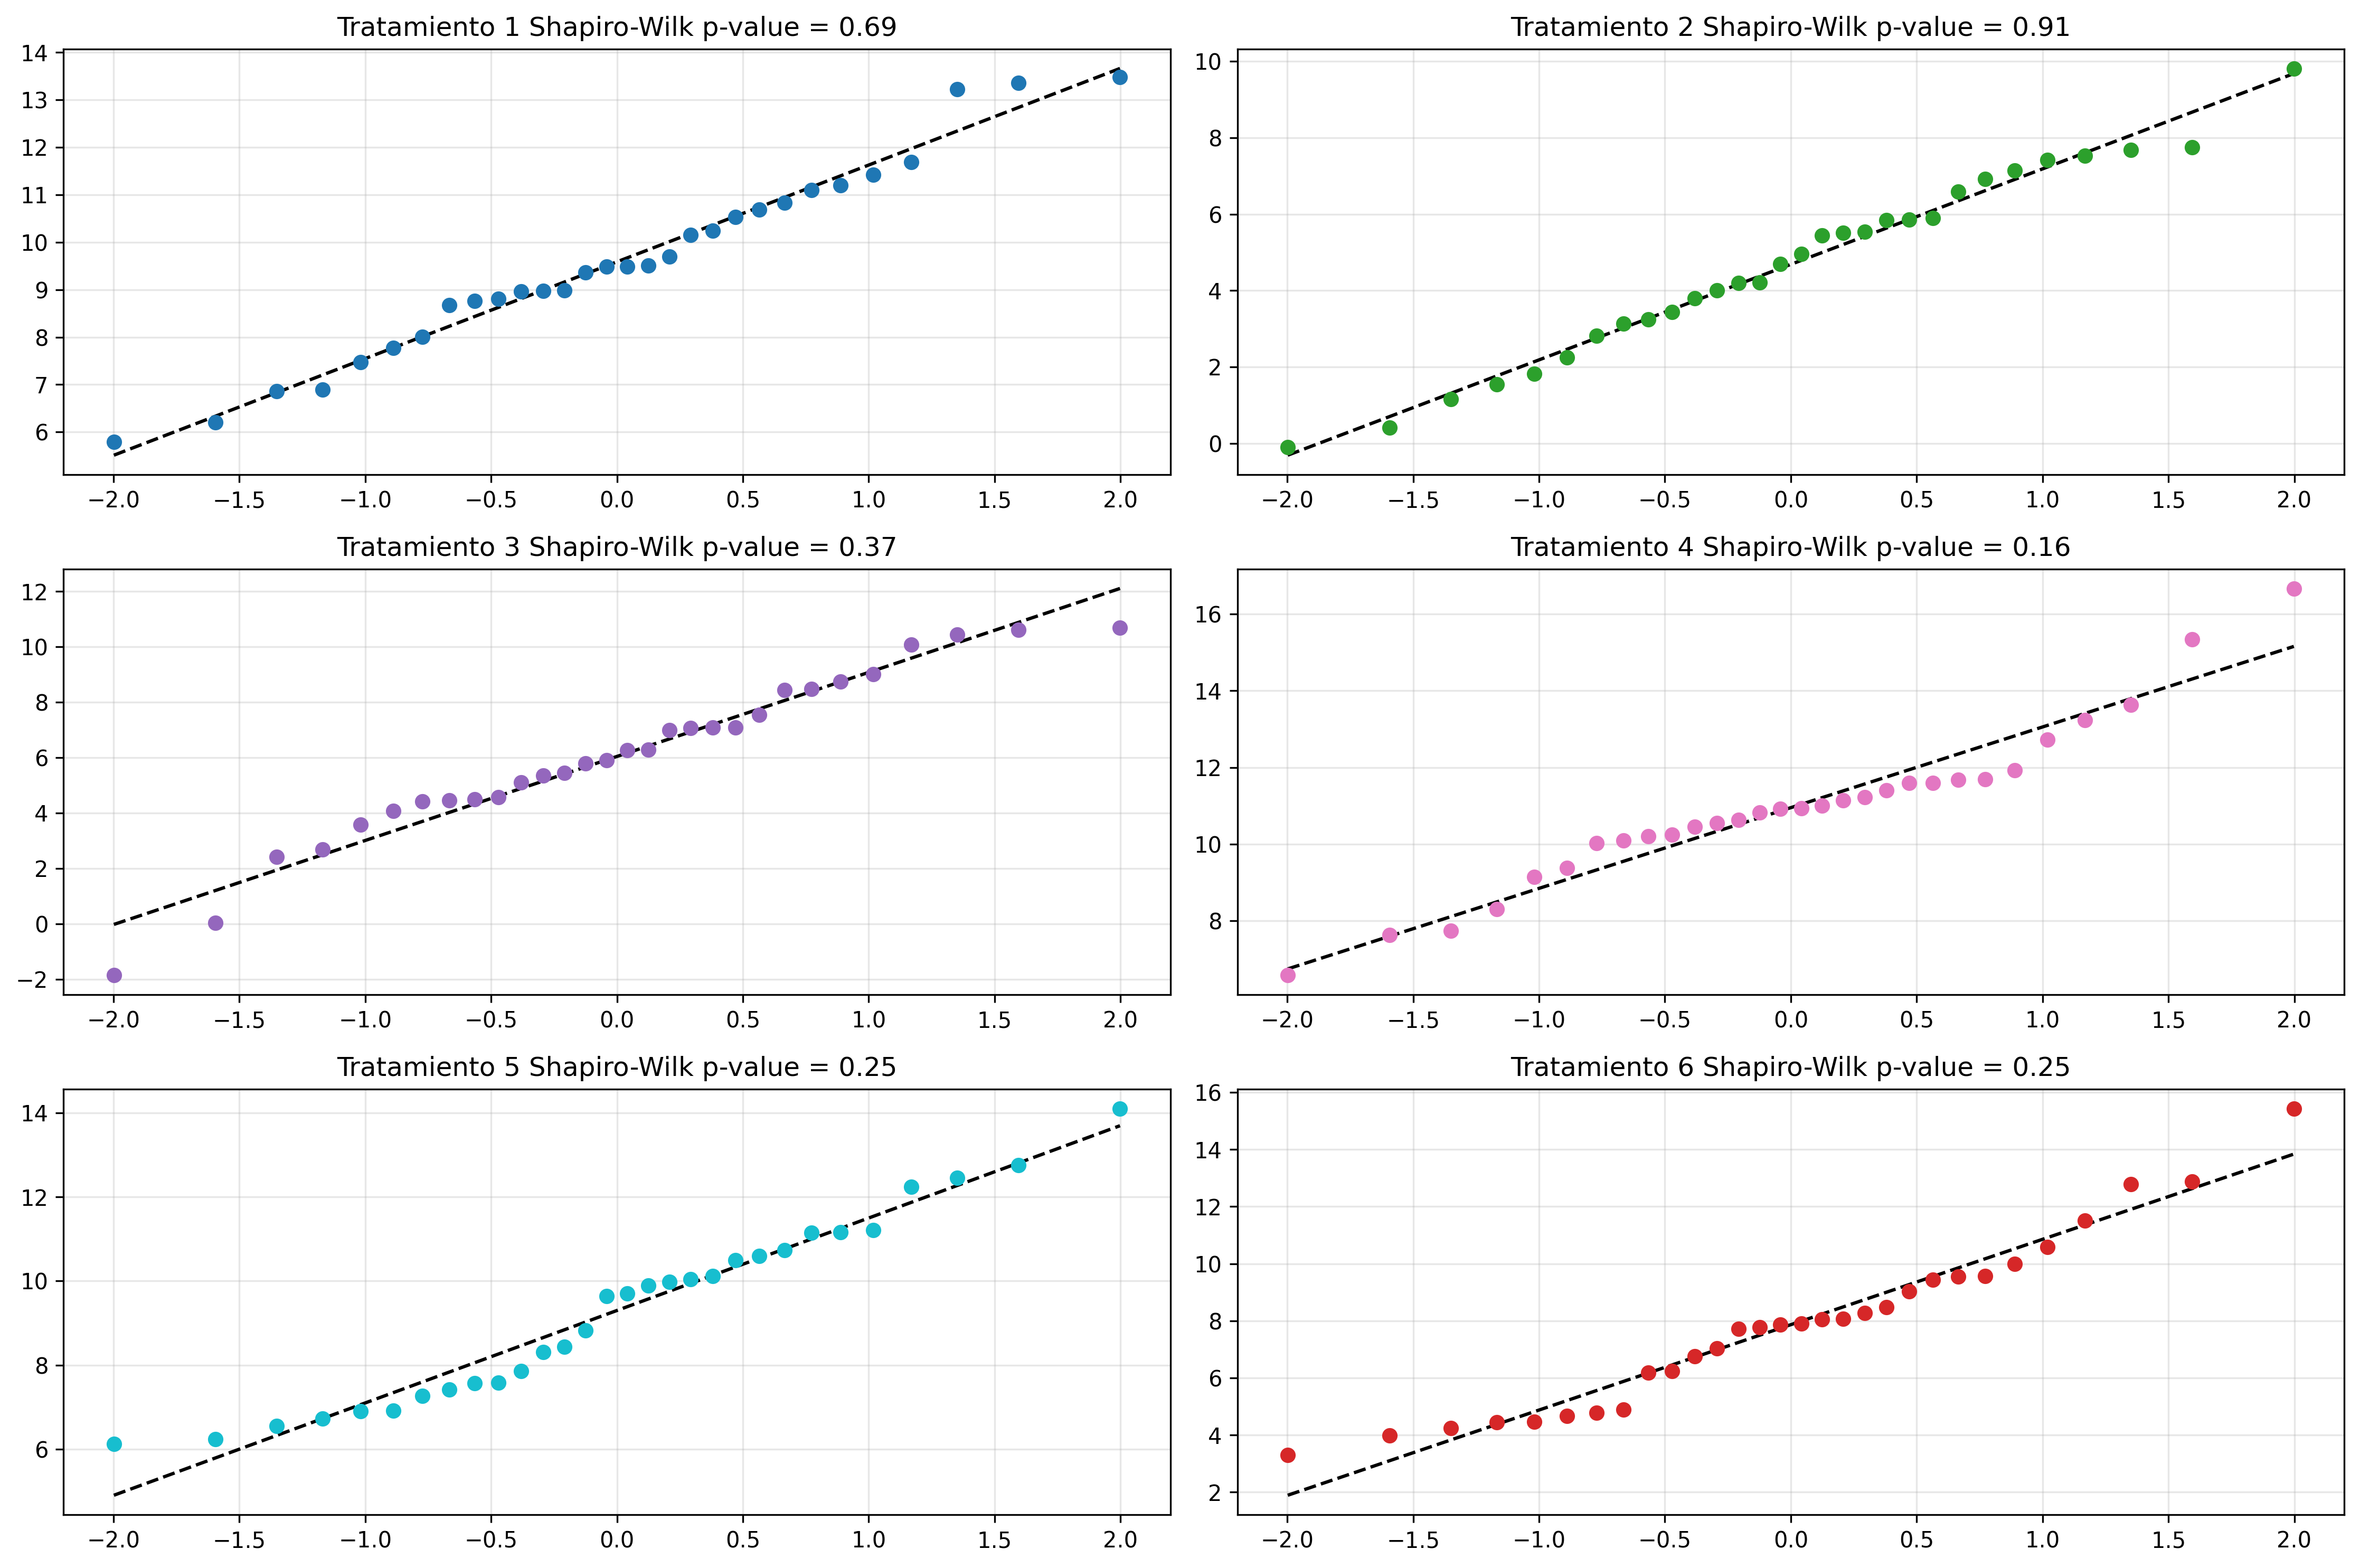

In [ ]:
import scipy.stats as st
fig, ax = plt.subplots(3,2, dpi = 300, figsize = (15,10))
i,j = 0,0
for c, trat in enumerate([tratamiento1, tratamiento2, tratamiento3, tratamiento4, tratamiento5, tratamiento6]):
    (osm, osr), (slope, intercept, r) = st.probplot(trat)
    ax[i,j].scatter(osm, osr, color = colors[c], zorder = 3)
    ax[i,j].plot(osm, slope*osm + intercept, color = 'k', linestyle = '--', zorder = 2)
    ax[i,j].grid(alpha = 0.3, zorder = 0)
    shapiro_trat = st.shapiro(trat)
    ax[i,j].set_title(f'Tratamiento {c+1} Shapiro-Wilk p-value = {shapiro_trat.pvalue:.2f}')
    if j == 1:
        j = 0
        i += 1
    else:
        j += 1
fig.tight_layout()

## 4.

Realice un análisis de varianza (ANOVA) para determinar si existen diferencias estadísticamente significativas entre los tratamientos. Presente una tabla ANOVA con los valores relevantes. ¿Qué se puede concluir respecto a
la efectividad de los tratamientos?

In [ ]:
# generamos el dataframe
df_plant = pd.DataFrame(columns = ['Tratamiento', 'Rendimiento'])
df_plant['Tratamiento'] = np.repeat([1,2,3,4,5,6], 30)
df_plant['Rendimiento'] = np.concatenate([tratamiento1, tratamiento2, tratamiento3,
                                          tratamiento4, tratamiento5, tratamiento6])
df_plant

,Tratamiento,Rendimiento
0,1,11.092771
1,1,9.695819
2,1,11.424915
3,1,13.350666
4,1,9.484863
...,...,...
175,6,9.564268
176,6,7.040306
177,6,11.505956
178,6,6.179564


In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

modelo = ols('Rendimiento ~ C(Tratamiento)', data = df_plant).fit()
tabla = anova_lm(modelo)
tabla

,df,sum_sq,mean_sq,F,PR(>F)
C(Tratamiento),5.0,832.620694,166.524139,27.557067,1.716351e-20
Residual,174.0,1051.461670,6.042883,NaN,NaN


Rechazamos la hipótesis nula de ANOVA, es decir existe al menos un tratamiento que causa un efecto en el rendimiento del experimento.

ANOVA no dice cuál es, ni la significancia de la diferencia :(


## 5.

Analice los residuos del modelo ajustado con ANOVA. Evalúe gráficamente y estadísticamente si los supuestos del modelo se cumplen. ¿Qué consecuencias trae que los residuos incumplan dichos supuestos?

---

El residuo en este caso es la diferencia entre el dato medido y el dato predicho, lo cual tiene sentido dado a que ANOVA es un modelo lineal.
Así:
$$
e_{ij}  = y_{ij} - \hat{y}_{ij}
$$
Y si recordamos, en un modelo de experimental CDR $ \hat{y}_{ij} = \overline{y}_i$, debido a que capturamos el efecto medio.

Para hacer esto en `python` hay que trabajar con el modelo lineal de ANOVA.


In [ ]:
residuos = modelo.resid
df_plant['residuos'] = residuos

Text(0, 0.5, 'Residuos')

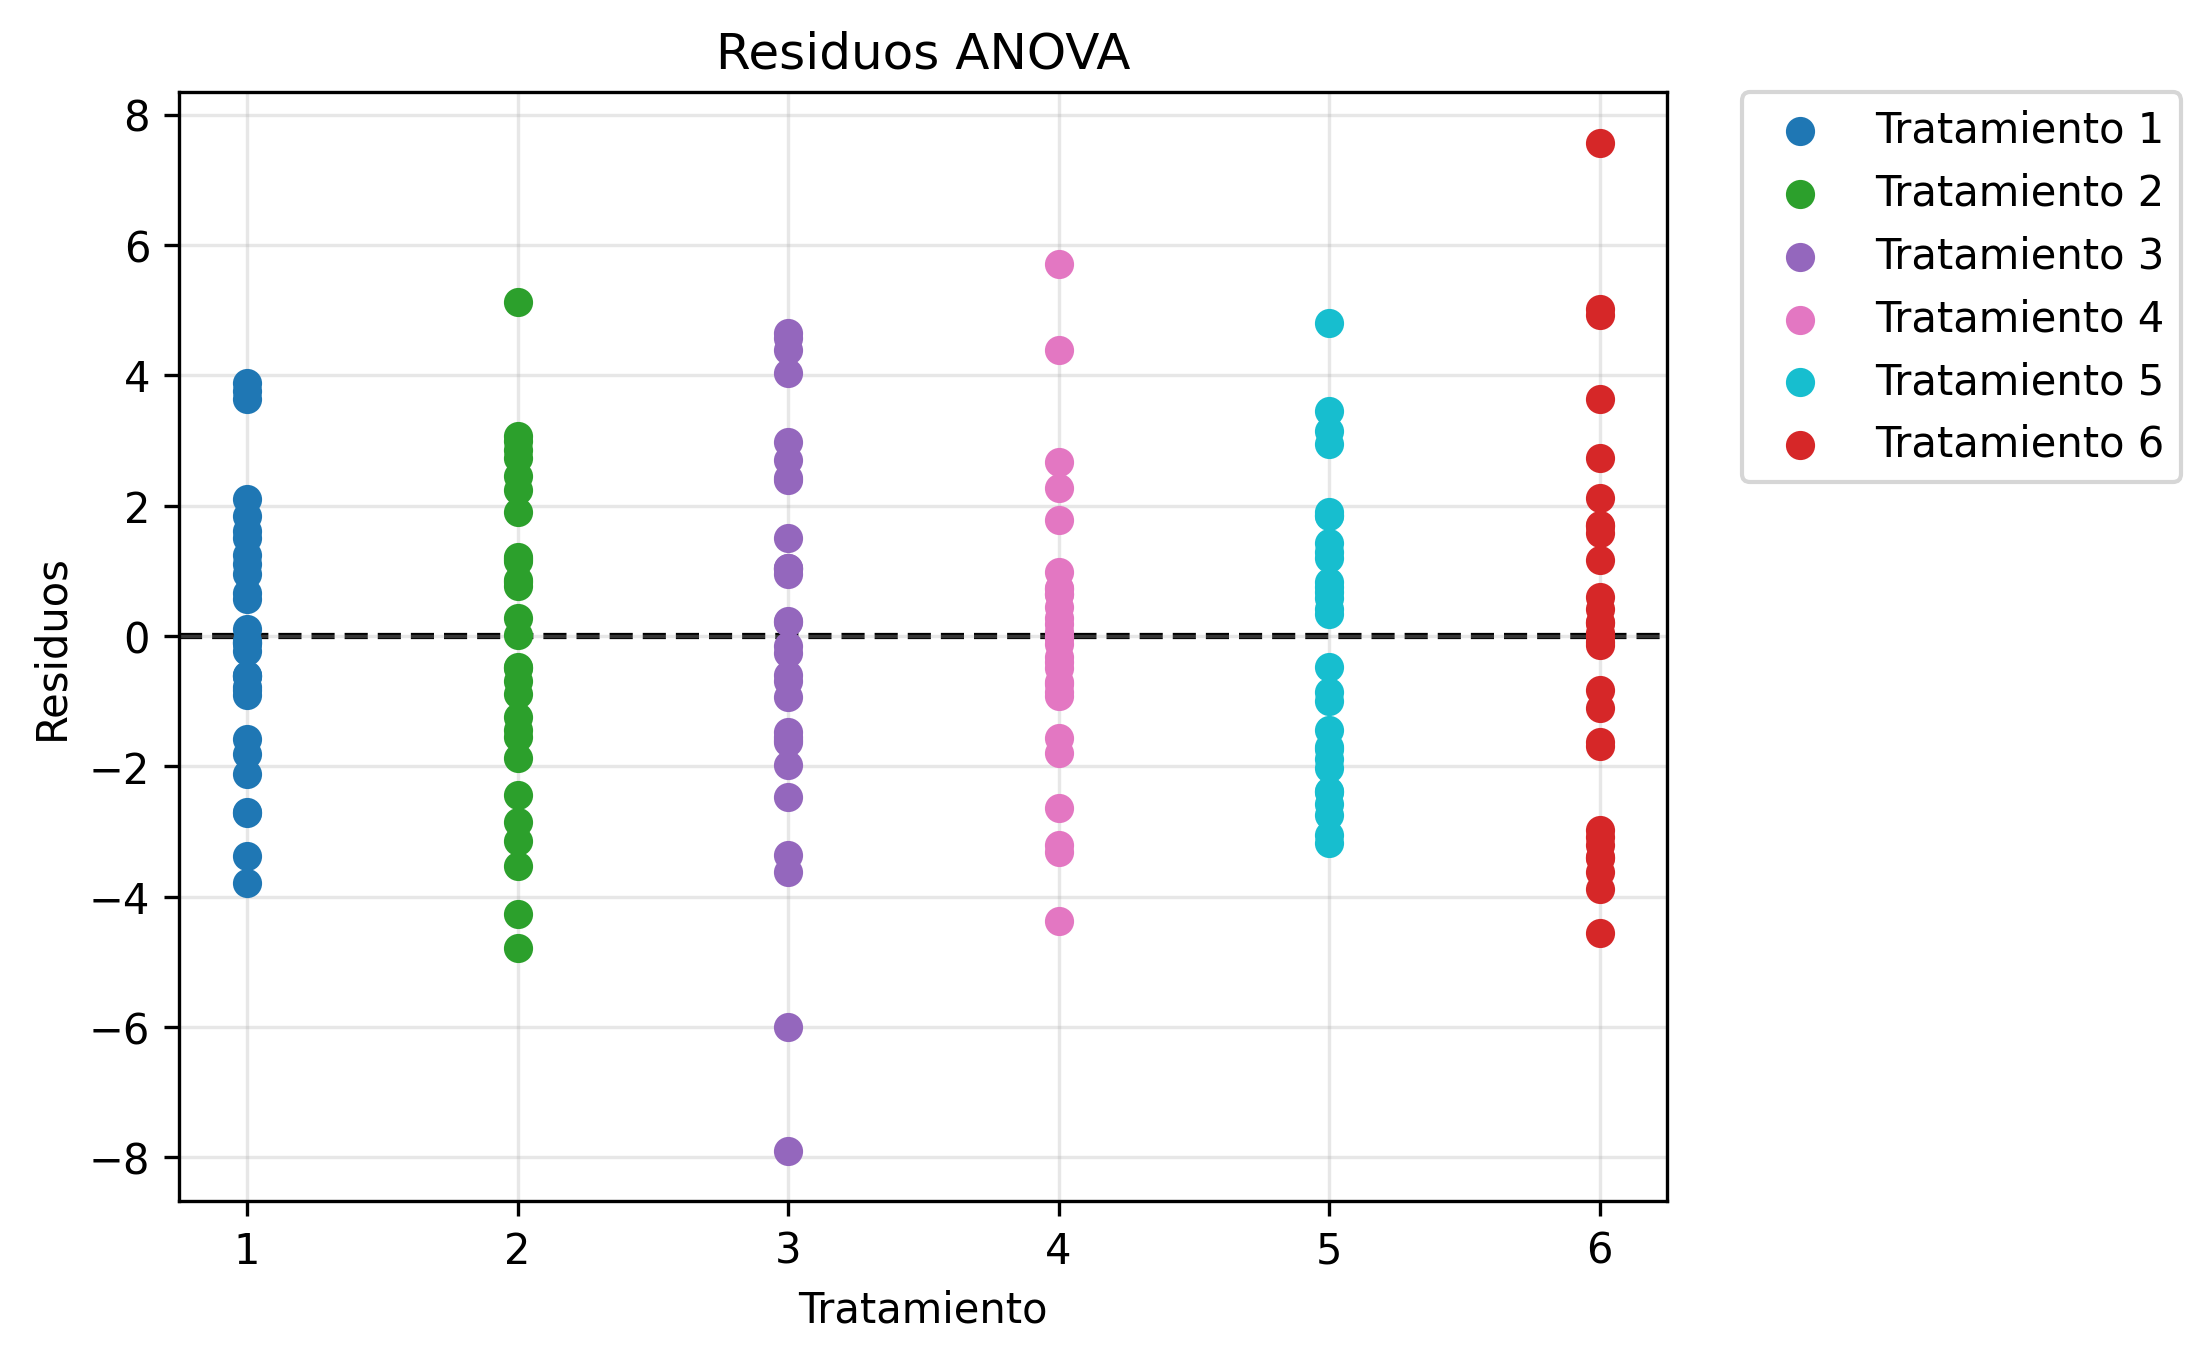

In [ ]:
fig, ax = plt.subplots(dpi = 300)

for i in df_plant['Tratamiento'].unique():
    df_trat = df_plant[df_plant['Tratamiento'] == i]
    ax.scatter(df_trat['Tratamiento'], df_trat['residuos'], color = colors[i-1], label = f'Tratamiento {i}',
               zorder = 2)
ax.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
ax.grid(alpha = 0.3, zorder = 0)
ax.axhline(0, color = 'k', linestyle = '--', zorder = 1)
ax.set_title('Residuos ANOVA')
ax.set_xlabel('Tratamiento')
ax.set_ylabel('Residuos')
#

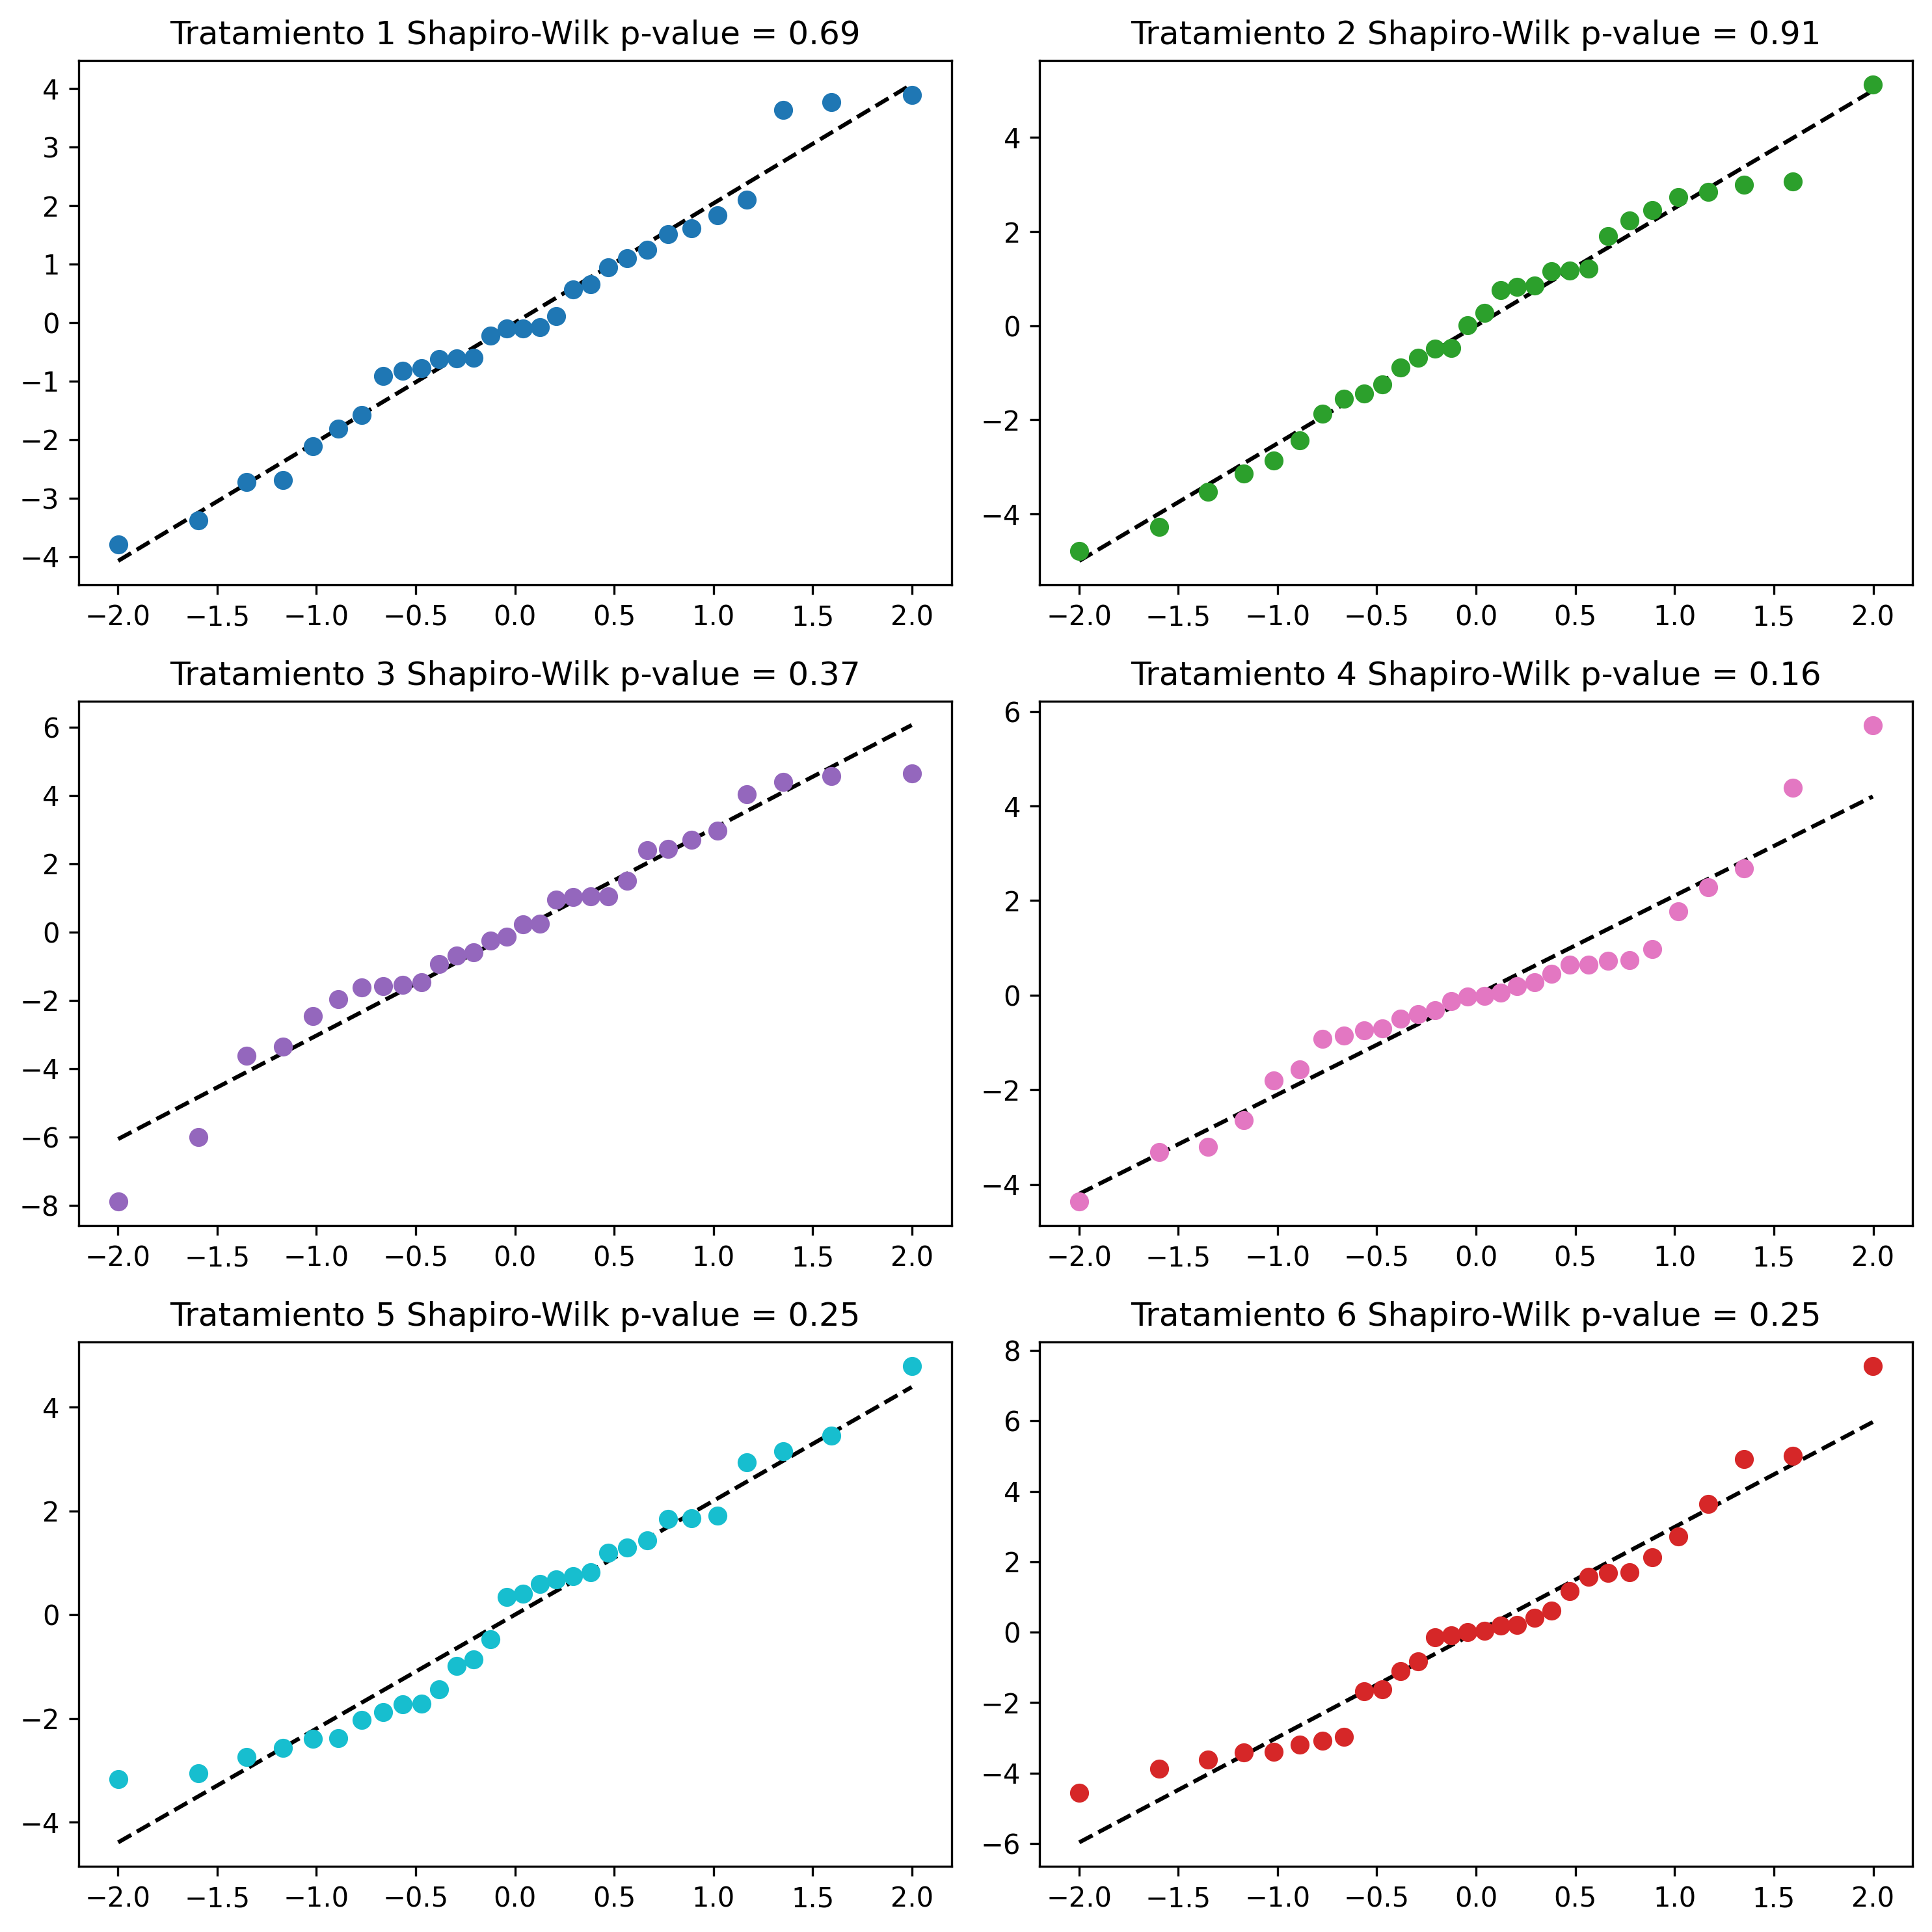

In [ ]:
fig, ax = plt.subplots(3,2,dpi = 300, figsize = (10,10))
i,j = 0,0
for trat in df_plant['Tratamiento'].unique():
    df_trat = df_plant[df_plant['Tratamiento'] == trat]
    shapiro_trat = st.shapiro(df_trat['residuos'])
    (osm, osr), (slope, intercept, r) = st.probplot(df_trat['residuos'])
    ax[i,j].scatter(osm, osr, color = colors[trat-1], zorder = 3)
    ax[i,j].plot(osm, osm*slope + intercept, color = 'k', linestyle = '--', zorder = 2)
    ax[i,j].grid(alpha = 0)
    ax[i,j].set_title(f'Tratamiento {trat} Shapiro-Wilk p-value = {shapiro_trat.pvalue:.2f}')
    if j == 1:
        j = 0
        i += 1
    else:
        j += 1
fig.tight_layout()


## 6.
Realice una prueba post-hoc adecuada para identificar específicamente qué pares de tratamientos presentan diferencias significativas. ¿Cuál tratamiento parece ser el más efectivo en
términos de rendimiento?

---
En este caso podemos utilizar dos metodologías. pairwise t-test y TukeyHSD.

En este caso utilizaremos la librería `pingouin` debido a que la función de pairwise t-test sigue siendo experimental en `statsmodels` y la documentación es poco clara.

----

**References**:

https://pingouin-stats.org/build/html/generated/pingouin.pairwise_tests.html

https://pingouin-stats.org/build/html/generated/pingouin.pairwise_tukey.html

In [ ]:
modelo.t_test_pairwise('C(Tratamiento)', method = 'bonferroni').result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-bonferroni,reject-bonferroni
2-1,-4.901099,0.634712,-7.721773,8.652382e-13,-6.153824,-3.648374,1.297857e-11,True
3-1,-3.547423,0.634712,-5.589030,8.680018e-08,-4.800147,-2.294698,1.302003e-06,True
4-1,1.367344,0.634712,2.154277,3.259393e-02,0.114619,2.620069,4.889090e-01,False
5-1,-0.285489,0.634712,-0.449793,6.534195e-01,-1.538214,0.967236,1.000000e+00,False
6-1,-1.721838,0.634712,-2.712788,7.342400e-03,-2.974563,-0.469113,1.101360e-01,False
3-2,1.353677,0.634712,2.132743,3.434797e-02,0.100952,2.606402,5.152195e-01,False
4-2,6.268444,0.634712,9.876050,1.526952e-18,5.015719,7.521169,2.290427e-17,True
5-2,4.615610,0.634712,7.271980,1.155436e-11,3.362885,5.868335,1.733154e-10,True
6-2,3.179261,0.634712,5.008985,1.335403e-06,1.926536,4.431986,2.003104e-05,True
4-3,4.914767,0.634712,7.743307,7.628736e-13,3.662042,6.167492,1.144310e-11,True


In [ ]:
!pip install pingouin

Lo importante de pingouin es que permite entregar un reporte total de los datos:

Para el ttest-pairwise

In [ ]:
import pingouin as pg

pg.pairwise_tests(data = df_plant, dv = 'Rendimiento', between = 'Tratamiento',
                  padjust = 'bonf', alternative='greater', alpha = 0.05, correction = True)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Tratamiento,1,2,False,True,8.583442,55.804359,greater,4.398993e-12,6.598490e-11,bonf,1.802e+09,2.187453
1,Tratamiento,1,3,False,True,5.435803,50.468233,greater,7.935002e-07,1.190250e-05,bonf,2.381e+04,1.385291
2,Tratamiento,1,4,False,True,-2.601161,57.830453,greater,9.941112e-01,1.000000e+00,bonf,0.121,-0.662895
3,Tratamiento,1,5,False,True,0.534891,57.607732,greater,2.973920e-01,1.000000e+00,bonf,0.592,0.136315
4,Tratamiento,1,6,False,True,2.662624,50.849327,greater,5.177654e-03,7.766481e-02,bonf,9.409,0.678558
5,Tratamiento,2,3,False,True,-1.932716,55.692418,greater,9.708188e-01,1.000000e+00,bonf,0.406,-0.492544
6,Tratamiento,2,4,False,True,-10.734568,56.793106,greater,1.000000e+00,1.000000e+00,bonf,2.592e-13,-2.735658
7,Tratamiento,2,5,False,True,-7.806915,57.206615,greater,1.000000e+00,1.000000e+00,bonf,9.344e-09,-1.989558
8,Tratamiento,2,6,False,True,-4.575291,55.961908,greater,9.999866e-01,1.000000e+00,bonf,0.001,-1.165993
9,Tratamiento,3,4,False,True,-7.402119,52.013285,greater,1.000000e+00,1.000000e+00,bonf,4.068e-08,-1.886398


O en su forma reducida:

In [ ]:
df_plant2 = pd.DataFrame(columns = [1,2,3,4,5,6])
df_plant2[1] = tratamiento1
df_plant2[2] = tratamiento2
df_plant2[3] = tratamiento3
df_plant2[4] = tratamiento4
df_plant2[5] = tratamiento5
df_plant2[6] = tratamiento6

pg.ptests(df_plant2, alternative = 'greater', stars=False, padjust = 'b' )

,1,2,3,4,5,6
1,-,0.000,0.000,1.,1.,0.075
2,8.583,-,1.,1.,1.,1.
3,5.436,-1.933,-,1.,1.,1.
4,-2.601,-10.735,-7.402,-,0.028,0.000
5,0.535,-7.807,-4.866,3.018,-,0.261
6,2.663,-4.575,-2.392,4.694,2.161,-


Por otro lado, TukeyHSD es un test que refiere a la existencia de significancia en la diferencia de medias de los datos.

In [ ]:
pg.pairwise_tukey(data = df_plant, dv = 'Rendimiento', between = 'Tratamiento')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,1,2,9.586077,4.684978,4.901099,0.634712,7.721773,1.296596e-11,2.187453
1,1,3,9.586077,6.038654,3.547423,0.634712,5.589030,1.289099e-06,1.385291
2,1,4,9.586077,10.953421,-1.367344,0.634712,-2.154277,2.648238e-01,-0.662895
3,1,5,9.586077,9.300588,0.285489,0.634712,0.449793,9.976518e-01,0.136315
4,1,6,9.586077,7.864239,1.721838,0.634712,2.712788,7.783824e-02,0.678558
5,2,3,4.684978,6.038654,-1.353677,0.634712,-2.132743,2.754709e-01,-0.492544
6,2,4,4.684978,10.953421,-6.268444,0.634712,-9.876050,0.000000e+00,-2.735658
7,2,5,4.684978,9.300588,-4.615610,0.634712,-7.271980,1.731435e-10,-1.989558
8,2,6,4.684978,7.864239,-3.179261,0.634712,-5.008985,1.959921e-05,-1.165993
9,3,4,6.038654,10.953421,-4.914767,0.634712,-7.743307,1.143163e-11,-1.886398


# Kruskal-Wallis


## 1.
Utilice tanto métodos gráficos como estadísticos para evaluar:
- Normalidad de sus datos
- Homocedasticidad de sus datos

¿Cuáles serían las consecuencias de realizar un test ANOVA sobre estos datos?

In [ ]:
np.random.seed(42)
def scale_data(datos):
    return (datos - datos.min())/(datos.max() - datos.min())
grupo_humano = scale_data(st.lognorm.rvs(loc = 1, s = 1, size = 30))
rocas = scale_data(st.expon.rvs(loc = 0, scale = 1, size = 30))
cafecito = scale_data(st.beta.rvs(a = 5, b = 1, size = 30))
nada = scale_data(st.norm.rvs(loc = 0, scale = 1, size = 30))

Text(0.5, 1.0, 'Rituales. Levene 0.81')

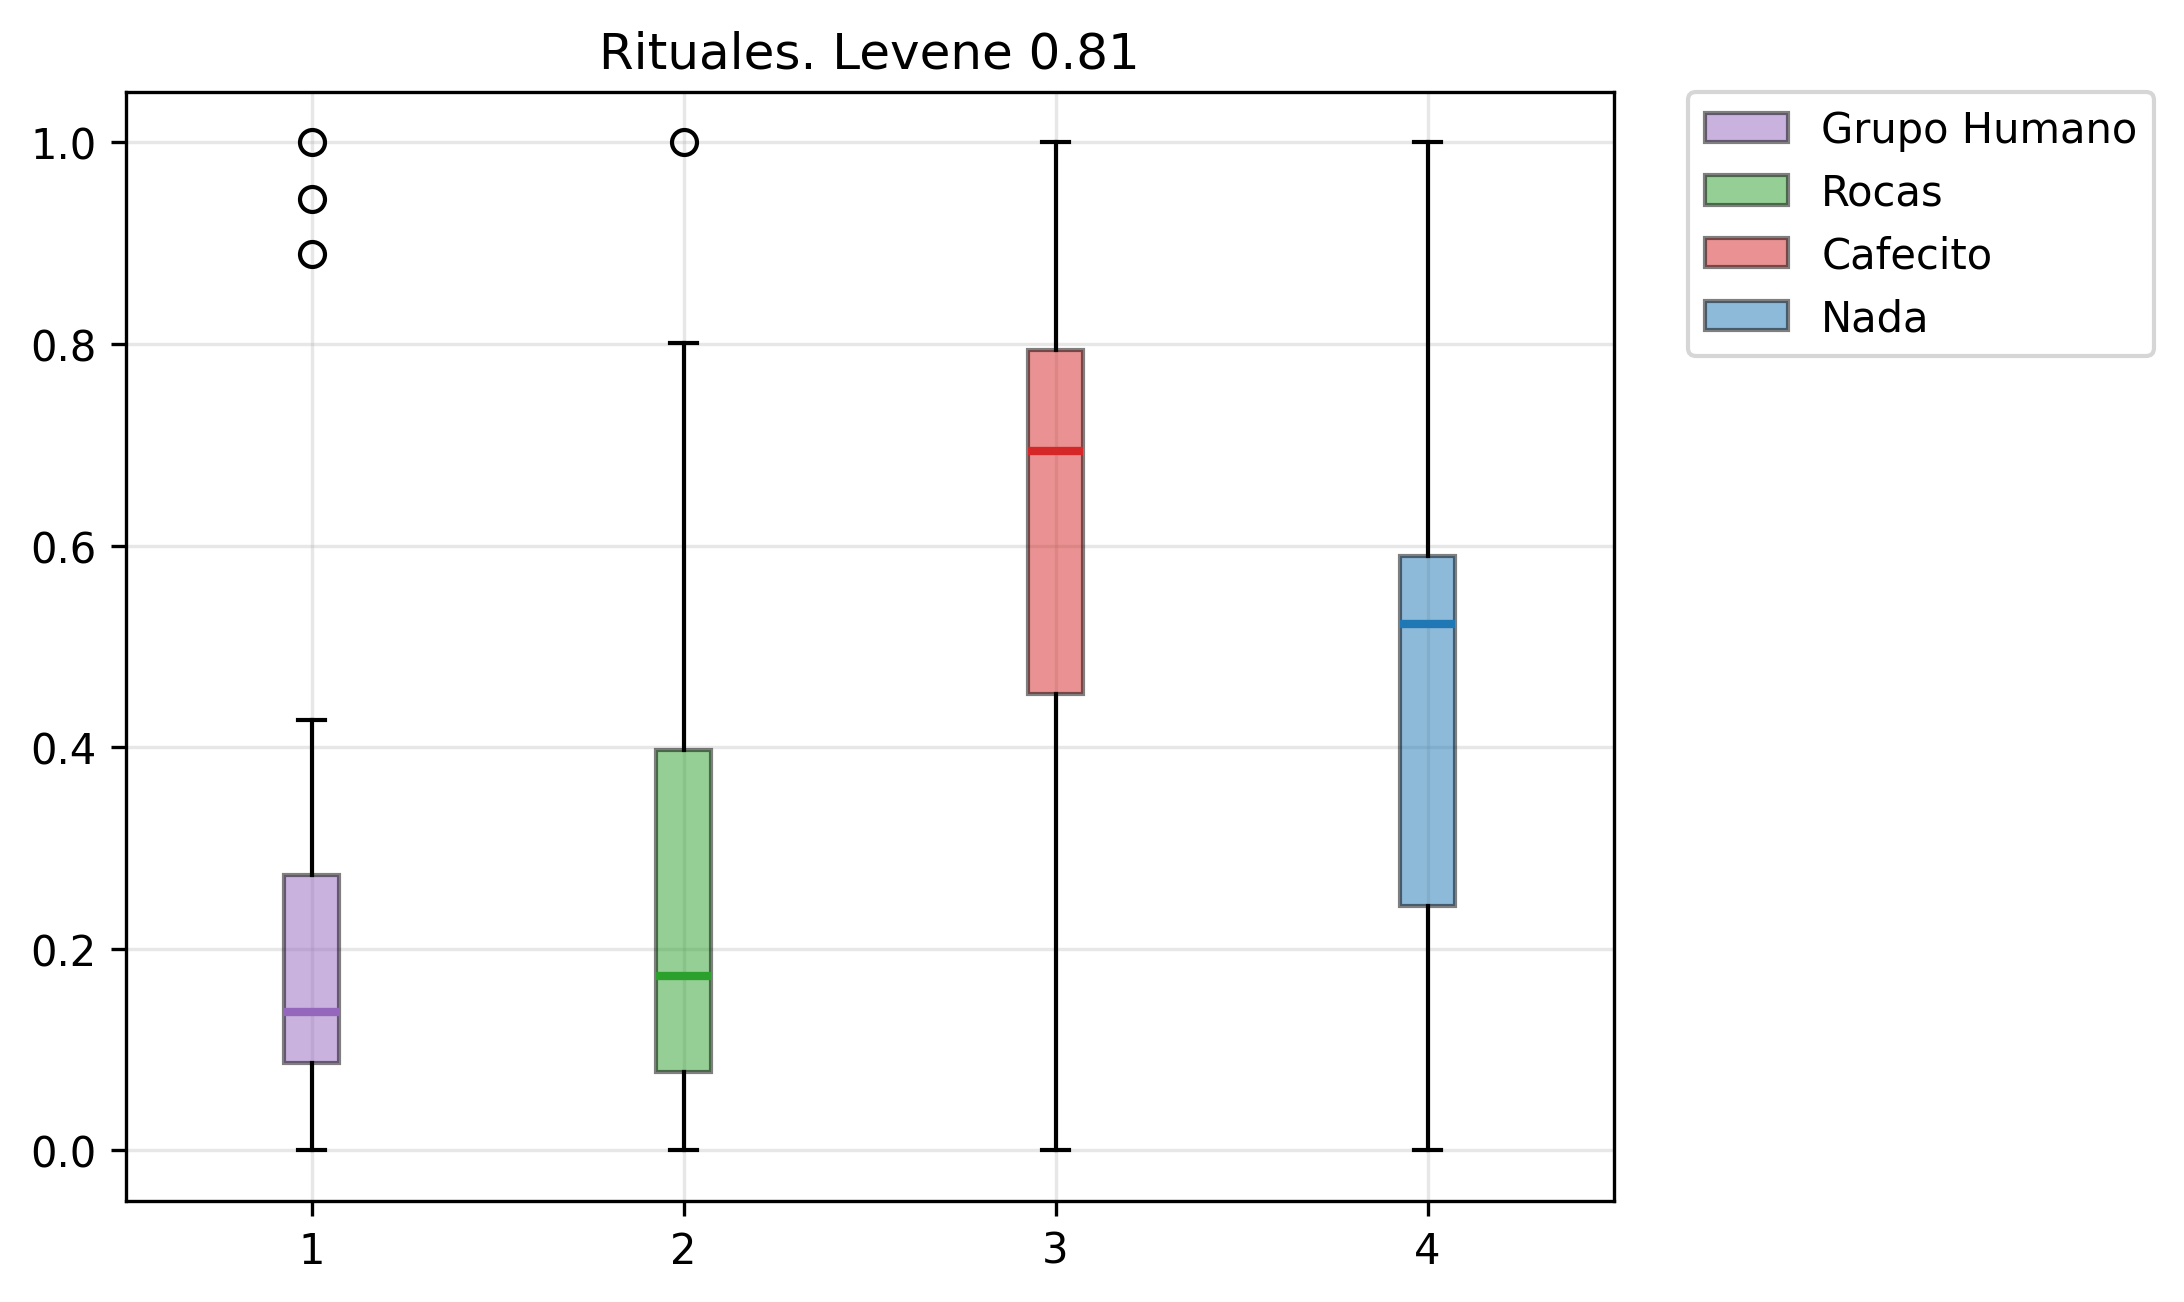

In [ ]:
# Homocedasticidad
fig, ax = plt.subplots(dpi = 300)
colors = ['tab:purple', 'tab:green', 'tab:red', 'tab:blue']
rit = ['Grupo Humano', 'Rocas', 'Cafecito', 'Nada']
for i, data in enumerate([grupo_humano, rocas, cafecito, nada]):
    ax.boxplot(
        data,
        positions = [i+1],
        patch_artist = True,
        boxprops = dict( facecolor = colors[i], alpha = 0.5),
        medianprops = dict(color = colors[i], linewidth = 2),
        label = rit[i],
        zorder = 3
    )
ax.grid(alpha = 0.3, zorder = 0)
#
ax.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
ax.set_xticks([1,2,3,4])
ax.set_title(f'Rituales. Levene {st.levene(grupo_humano, rocas, cafecito, nada).pvalue:.2f}')


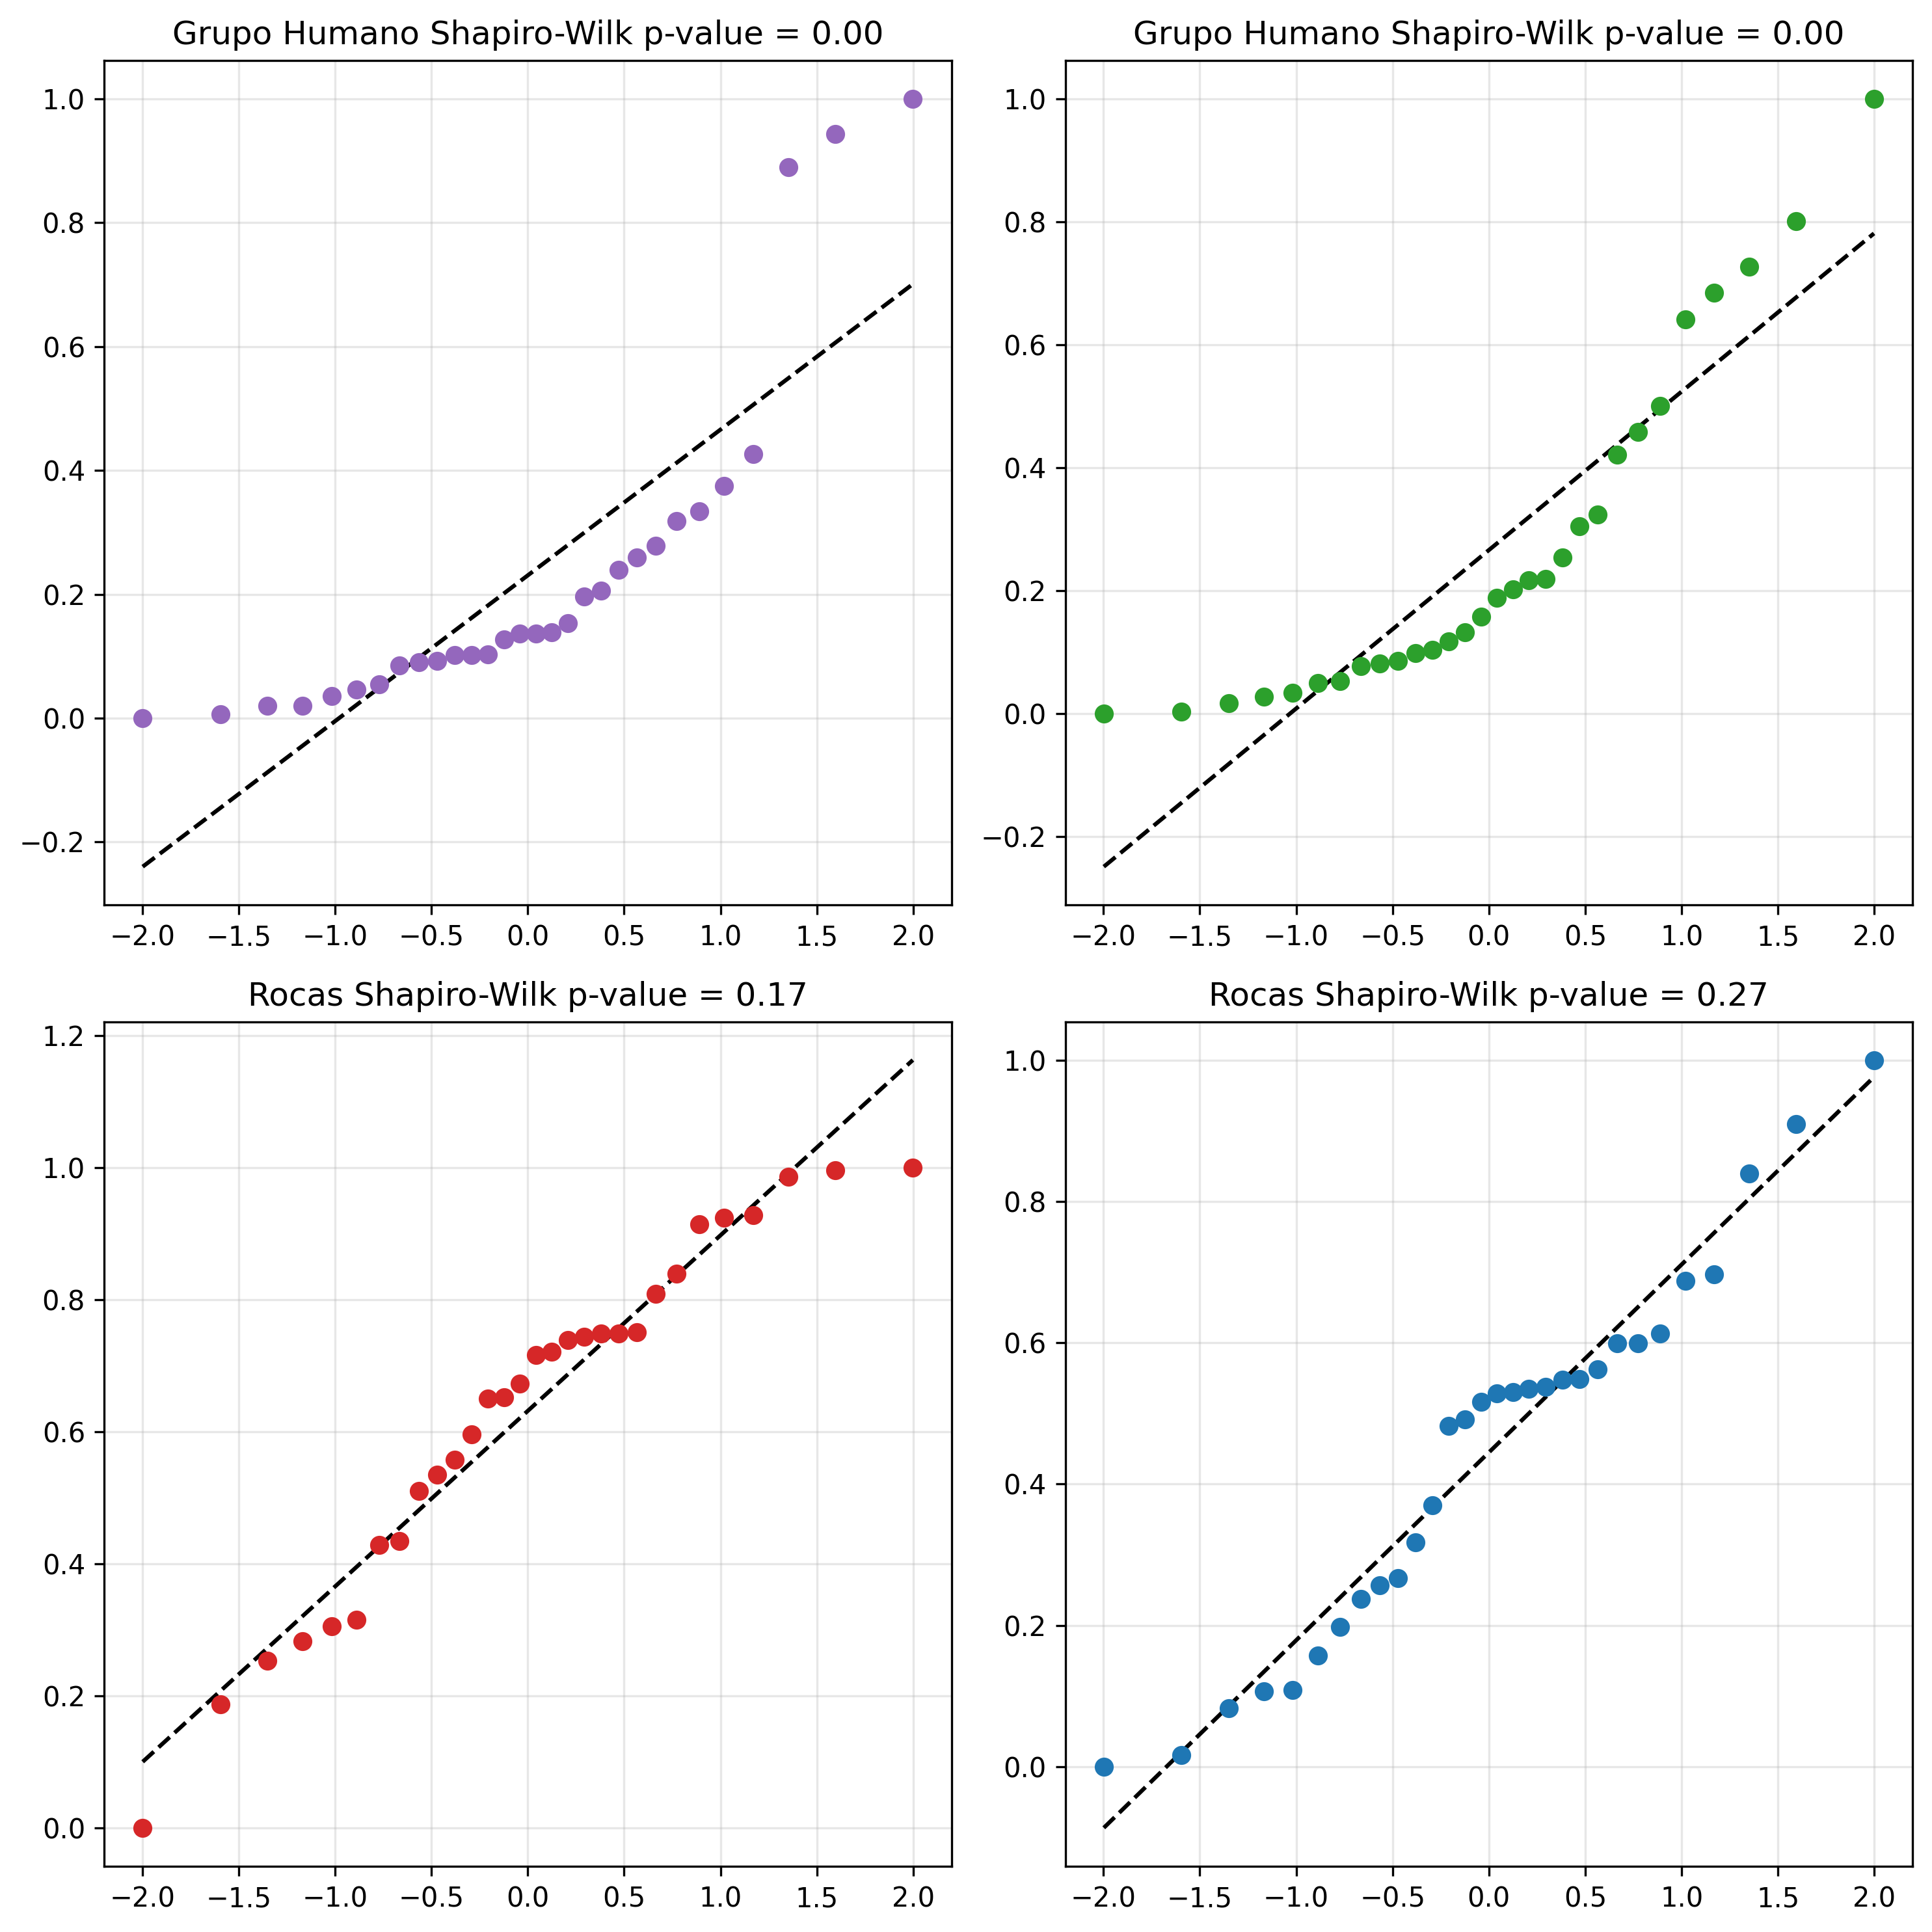

In [ ]:
# Normalidad

fig, ax = plt.subplots(2,2,dpi = 300, figsize = (10,10))
colors = ['tab:purple', 'tab:green', 'tab:red', 'tab:blue']
rit = ['Grupo Humano', 'Rocas', 'Cafecito', 'Nada']
i, j = 0,0
for c, data in enumerate([grupo_humano, rocas, cafecito, nada]):
    shapiro_test = st.shapiro(data)
    (osm, osr), (slope, intercept, r) = st.probplot(data)
    ax[i,j].scatter(osm, osr, color = colors[c], zorder = 3)
    ax[i,j].plot(osm, slope*osm + intercept, color = 'k', linestyle = '--', zorder = 2)
    ax[i,j].grid(alpha = 0.3, zorder = 0)
    ax[i,j].set_title(f'{rit[i]} Shapiro-Wilk p-value = {shapiro_test.pvalue:.2f}')
    if j == 1:
        j = 0
        i += 1
    else:
        j += 1
fig.tight_layout()

# 2.
Realice un test estadístico que le permita comparar los efectos de los diferentes rituales a la
hora de dar una prueba. Justifique.

---

En este caso se realiza un test de kurskal wallis.

In [ ]:
krusk = st.kruskal(
    grupo_humano, rocas, cafecito, nada
)
print(f'p-value: {krusk.pvalue}')


p-value: 2.5773621688536523e-07


Este test tiene la misma hipótesis que un test ANOVA, de forma que existen rituales con un efecto diferente.

## 3.
Realice un test estadístico que le permita evaluar cuál de los 4 rituales es el más eficaz y cuál es el que trae consigo los peores resultados. Justifique adecuadamente que test realizaría, tomando en cuenta los supuestos que este realiza.

---

En este caso realizamos un test MannWhitney U test para evaluar los diferentes datos debido a que al haber datos no-normales es necesario realizar tests no paramétricos.

In [ ]:
rituales_df = pd.DataFrame(columns = ['Nota', 'Ritual'])
rituales_df['Nota'] = np.concatenate([grupo_humano, rocas, cafecito, nada])
rituales_df['Ritual'] = np.repeat(['Grupo Humano', 'Rocas', 'Cafecito', 'Nada'], 30)
pg.pairwise_tests(data = rituales_df, dv = 'Nota', between = 'Ritual', parametric = False,
                  padjust = 'bonf', alternative='greater', alpha = 0.05, correction = True)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,hedges
0,Ritual,Cafecito,Grupo Humano,False,False,766.0,greater,0.000002,0.000009,bonf,1.497880
1,Ritual,Cafecito,Nada,False,False,637.0,greater,0.002913,0.017480,bonf,0.705945
2,Ritual,Cafecito,Rocas,False,False,748.0,greater,0.000005,0.000033,bonf,1.359478
3,Ritual,Grupo Humano,Nada,False,False,227.0,greater,0.999524,1.000000,bonf,-0.801882
4,Ritual,Grupo Humano,Rocas,False,False,424.0,greater,0.652396,1.000000,bonf,-0.129963
5,Ritual,Nada,Rocas,False,False,632.0,greater,0.003643,0.021860,bonf,0.666547


Así, el cafecito siempre triunfa y apoya en momentos difíciles.